## Описание проекта

Нам поступил заказ: нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Основная идея решения задачи:

1) Создать модель предсказания ДТП (целевое значение — `at_fault` (виновник) в таблице `parties`)

    - Для модели выбрать тип виновника — только машина (`car`).
    - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа `SCRATCH` (царапина).
    - Для моделирования ограничиться данными за 2012 год — они самые свежие.
    - Обязательное условие — учесть фактор возраста автомобиля.

2) На основе модели исследовать основные факторы ДТП.

3) Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:

    - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
    - Какие ещё факторы нужно учесть?
    - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

Заказчик предлагает вам поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы. 

## Описание таблиц данных

### Краткое описание 

- `collisions` — общая информация о ДТП.
    Имеет уникальный `case_id`. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и когда.
    
    
- `parties` — информация об участниках ДТП.
    Имеет неуникальный `case_id`, который сопоставляется с соответствующим ДТП в таблице `collisions`. Каждая строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице должно быть две строки с совпадением `case_id`. Если нужен уникальный идентификатор, это `case_id` and `party_number`.
    
        
- `vehicles` — информация о пострадавших машинах
    Имеет неуникальные `case_id` и неуникальные `party_number`, которые сопоставляются с таблицей collisions и таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

### Таблица `collisions` (информация о происшествиях)

- `CASE_ID` - Уникальный номер для зарегистрированного происшествия в таблице происшествий.
- `COLLISION_DATE` - Идентификационный  Номер в базе данных
- `COLLISION_TIME` - Время происшествия
- `INTERSECTION` - Является ли место происшествие перекрёстком
- `WEATHER_1` - Погода
- `COLLISION_DAMAGE` - Серьёзность происшествия
- `PRIMARY_COLL_FACTO` - Основной фактор аварии
- `ROAD_SURFACE` - Состояние дороги	
- `LIGHTING` - Освещение	
- `COUNTY_CITY_LOCATION` - Номер географических районов, где произошло ДТП	
- `COUNTY_LOCATION` - Названия географических районов, где произошло ДТП
- `DIRECTION` - Направление движения	
- `DISTANCE` - Расстояние от главной дороги (метры)
- `LOCATION_TYPE` - Тип дороги	
- `PARTY_COUNT` - Количество участников
- `PCF_VIOLATION_CATEGORY` - Категория нарушения
- `TYPE_OF_COLLISION`	- Тип аварии	
- `MOTOR_VEHICLE_INVOLVED_WITH` - Дополнительные участники ДТП
- `ROAD_CONDITION_`1 - Дорожное состояние
- `CONTROL_DEVICE` - Устройство управления	

### Таблица `parties` (описание участников происшествия)

- `CASE_ID` - Идентификационный  номер в базе данных
- `PARTY_NUMBER` - Номер участника происшествия
- `PARTY_TYPE` - Тип участника происшествия
- `AT_FAULT` - Виновность участника
- `INSURANCE_PREMIUM` - Сумма страховки (тыс. долларов)
- `PARTY_DRUG_PHYSICAL` - Состояние участника: физическое или с учётом принятых лекарств
- `PARTY_SOBRIETY` - Трезвость участника
- `CELLPHONE_IN_USE` - Наличие телефона в автомобиле (возможности разговаривать по громкой связи)

### Таблица `vehicles` (Описание автомобиля)

- `ID` - Индекс текущей таблицы
- `CASE_ID` - Идентификационный номер в базе данных
- `VEHICLE_TYPE` - Тип кузова
- `VEHICLE_TRANSMISSION` - Тип КПП
- `VEHICLE_AGE` - Возраст автомобиля (в годах)

## План работы:

1. Подкючиться к базе данных;

2. Провести первичное исследование таблиц, используя sql-запросы и выяснить:
    - все ли таблицы имеют набор данных;
    - соответствует ли количество таблиц условию задачи;
    - имеется ли общий ключ для связи таблиц.

3. Провести статистический анализ факторов ДТП и выяснить:
    - в какие месяцы происходит наибольшее количество аварий;
    - создать аналитические задачи для своих коллег.
    
4. Осуществить необходимую выгрузку данных через sql-запрос;

5. Провести анализ выгруженных данных;

6. Произвести очистку данных от пропусков, дубликатов и аномалий перед передачей их в модель;

7. Создать модель для оценки водительского риска;

8. Произвести анализ резульатов модели;

9. Дать рекомендации бизнесу.

### Cкачивание и импорт необходимых библиотек

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy

import phik #библбиотека для построения корреляционной матрицы
import missingno as msno #библбиотека для графического представления пропусков в данных

from sqlalchemy import create_engine #библбиотека для подключения к серверу с БД

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.metrics import f1_score, precision_recall_curve

In [3]:
#функция для вывода подробной информации по датасету
def get_data_info(data):
    display(data.sample(7))
    display(data.info())
    display(data.describe(include='all'))

#константа для воспроизводимости результатов
SEED = 12345

## Подключение к SQL-базе (Яндекса). Загрузка таблиц sql.

In [4]:
%%time

#запишем наши данные для входа в объект словаря
db_config = {
    'user': 'praktikum_student', # имя пользователя,
    'pwd': 'Sdf4$2;d-d30pp', # пароль,
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения,
    'db': 'data-science-vehicle-db' # название базы данных,
} 

#строка с данными для подключения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

#создание соединения с SQL-сервером, откуда будем подтягивать данные
engine = create_engine(connection_string)

CPU times: user 36.9 ms, sys: 42 ms, total: 78.9 ms
Wall time: 8.1 s


In [5]:
#запишем sql-код в строковом формате, чтобы потом передать его как запрос

collisions_query = '''
SELECT *
FROM collisions
LIMIT 1000
''' 

parties_query = '''
SELECT *
FROM parties
LIMIT 1000
'''

vehicles_query = '''
SELECT *
FROM vehicles
LIMIT 1000
'''

case_ids_query = '''
SELECT *
FROM case_ids
LIMIT 1000
'''

In [6]:
%%time

collisions = pd.read_sql_query(collisions_query, con=engine)
parties = pd.read_sql_query(parties_query, con=engine)
vehicles = pd.read_sql_query(vehicles_query, con=engine)
case_ids = pd.read_sql_query(case_ids_query, con=engine) 

CPU times: user 29.8 ms, sys: 11.4 ms, total: 41.2 ms
Wall time: 378 ms


## Проведение первичного исследования таблиц

In [7]:
print('Collisions')
display(collisions.head())

print('\n Parties')
display(parties.head())

print('\n Vehicles')
display(vehicles.head())

print('\n Case_ids')
display(case_ids.head())

Collisions


,case_id,county_city_location,county_location,distance,direction,intersection,weather_1,location_type,collision_damage,party_count,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
0,4083072,1942,los angeles,528.0,north,0.0,cloudy,highway,small damage,2,vehicle code violation,unsafe lane change,sideswipe,other motor vehicle,wet,normal,daylight,none,2009-01-22,07:25:00
1,4083075,4313,santa clara,0.0,None,1.0,clear,None,small damage,1,vehicle code violation,improper passing,hit object,fixed object,dry,normal,dark with street lights,functioning,2009-01-03,02:26:00
2,4083073,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,improper turning,broadside,other motor vehicle,dry,normal,dark with street lights,functioning,2009-01-11,03:32:00
3,4083077,0109,alameda,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,daylight,functioning,2009-01-11,10:35:00
4,4083087,4313,santa clara,0.0,None,1.0,clear,None,scratch,2,vehicle code violation,speeding,rear end,other motor vehicle,dry,None,dark with street lights,functioning,2009-01-02,22:43:00



 Parties


,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use
0,22,3899454,1,road signs,1,29.0,had not been drinking,None,0.0
1,23,3899454,2,road signs,0,7.0,had not been drinking,None,0.0
2,29,3899462,2,car,0,21.0,had not been drinking,None,0.0
3,31,3899465,2,road signs,0,24.0,had not been drinking,None,0.0
4,41,3899478,2,road bumper,0,NaN,not applicable,not applicable,0.0



 Vehicles


,id,case_id,party_number,vehicle_type,vehicle_transmission,vehicle_age
0,1175713,5305032,2,sedan,manual,3.0
1,1,3858022,1,sedan,auto,3.0
2,1175712,5305030,1,sedan,auto,3.0
3,1175717,5305033,3,sedan,auto,5.0
4,1175722,5305034,2,sedan,auto,5.0



 Case_ids


,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


---

In [8]:
#определим количество представлений в базе данных, откуда мы взяли наши датасеты
information_schema_str = '''
SELECT table_name 
FROM information_schema.tables
'''

display(pd.read_sql_query(information_schema_str, con=engine))

,table_name
0,pg_type
1,pg_foreign_table
2,pg_roles
3,pg_settings
4,pg_amop
...,...
183,pg_inherits
184,collisions
185,case_ids
186,parties


---

In [9]:
print('Collisions')
display(collisions.info())

print('\n Parties')
display(parties.info())

print('\n Vehicles')
display(vehicles.info())

print('\n Case_ids')
display(case_ids.info())

Collisions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      1000 non-null   object 
 1   county_city_location         1000 non-null   object 
 2   county_location              1000 non-null   object 
 3   distance                     1000 non-null   float64
 4   direction                    688 non-null    object 
 5   intersection                 990 non-null    float64
 6   weather_1                    990 non-null    object 
 7   location_type                329 non-null    object 
 8   collision_damage             1000 non-null   object 
 9   party_count                  1000 non-null   int64  
 10  primary_collision_factor     989 non-null    object 
 11  pcf_violation_category       975 non-null    object 
 12  type_of_collision            994 non-null    object 
 13  motor_ve

None


 Parties
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   case_id              1000 non-null   object 
 2   party_number         1000 non-null   int64  
 3   party_type           982 non-null    object 
 4   at_fault             1000 non-null   int64  
 5   insurance_premium    368 non-null    float64
 6   party_sobriety       901 non-null    object 
 7   party_drug_physical  539 non-null    object 
 8   cellphone_in_use     526 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


None


 Vehicles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   case_id               1000 non-null   object 
 2   party_number          1000 non-null   int64  
 3   vehicle_type          1000 non-null   object 
 4   vehicle_transmission  992 non-null    object 
 5   vehicle_age           965 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


None


 Case_ids
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   case_id  1000 non-null   object
 1   db_year  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


None

---

Судя по выводу выше наших данных можно сказать следующее:
- Все интересующуие нас таблицы не пустые;
- Во всех таблицах, названия столбцов соответствуют названиям на ER-диаграмме, кроме `Case_ids` (тут столбец `db_year` вместо `Case_id`;
- Количество таблиц в базе данных много больше необходимого нам количества. Аж, 188 штук;
- Типы данных везде верные, кроме `vehicle_age`, `insurance_premium`, `intersection` (`float64 -> int64`), так как там есть пропуски; `cellphone_in_use` (`float64 -> int64`) пропусков нет, а значит не верный тип был указан в диаграмме.
- Таблицы имеют столбец для связи между собой, а именно `case_id`.

##  Проведение статистического анализа факторов ДТП

### Анализ количества аварий по месяцам за весь период наблюдений

In [10]:
query = '''
SELECT DISTINCT
       EXTRACT(MONTH FROM collision_date::date) AS collision_month, 
       COUNT(*) AS count_collisions
FROM collisions
GROUP BY EXTRACT(MONTH FROM collision_date::date)
ORDER BY collision_month
''' 

df = pd.read_sql_query(query, con=engine)

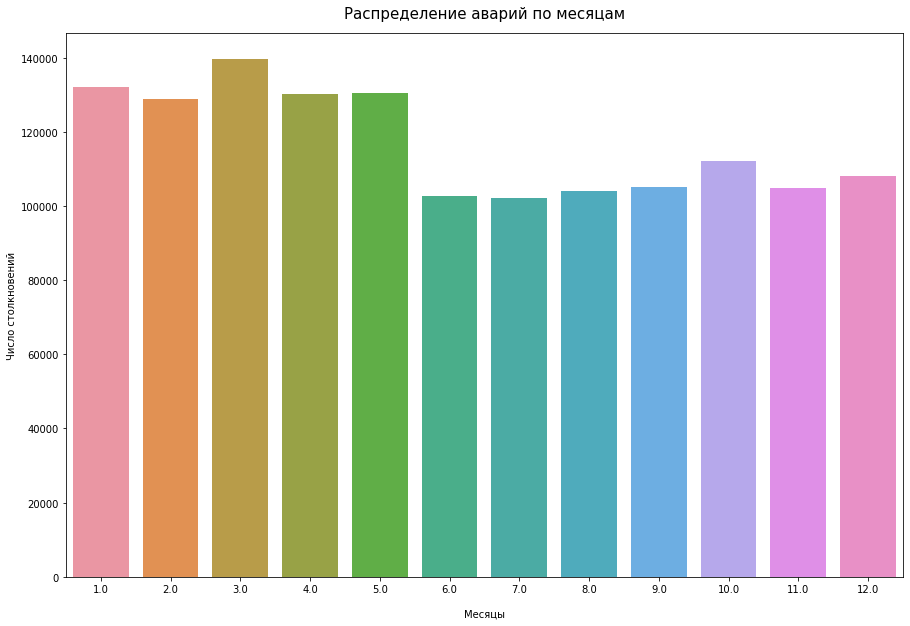

In [11]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="collision_month", y="count_collisions")
plt.xlabel('Месяцы', labelpad=15)
plt.ylabel('Число столкновений')
plt.title('Распределение аварий по месяцам', fontsize=15, pad=15)
plt.show()

Как мы видим из данных за весь период наблюдения, наибольшее число аварий приходиться на `январь - май`, после количество аварий, примерно, одинаковое, потом в `декабре` число аварий увеличивается.

Самое большое число аварий приходиться на март. Это можно связать с тем, что в этот период начинает теплеть, однако днём может быть тепло, а ночью ниже нуля. Данная ситуация приводит к тому, что 'переобутые' в связи с потеплением в летнюю резину машины начинают терять управление, что логично приводит к авариям.

Если рассматривать период с `января` по `февраль`, то очевидно, почему в это время большое количество аварий - плохая управляемость, видимость дороги и остальные сопутствующие зиме факторы.

Что касается `апреля` и `мая`, то в данный период часть автолюбителей забывают поменять зимнюю резину на летнюю, а это опасно, так как она мягче летнего комплекта, что приводит к повышенному скольжению и износу. Как следствие, к авариям.

In [12]:
del collisions, parties, vehicles, case_ids, df, query, information_schema_str, collisions_query, parties_query, vehicles_query, case_ids_query

In [13]:
query = '''
SELECT DISTINCT
       EXTRACT(YEAR FROM collision_date::date) AS collision_year,
       EXTRACT(MONTH FROM collision_date::date) AS collision_month, 
       COUNT(*) AS count_collisions
FROM collisions
GROUP BY EXTRACT(YEAR FROM collision_date::date), EXTRACT(MONTH FROM collision_date::date)
ORDER BY collision_year, collision_month
''' 

df = pd.read_sql_query(query, con=engine)
df

,collision_year,collision_month,count_collisions
0,2009.0,1.0,35062
1,2009.0,2.0,34480
2,2009.0,3.0,36648
3,2009.0,4.0,35239
4,2009.0,5.0,36916
5,2009.0,6.0,34202
6,2009.0,7.0,35161
7,2009.0,8.0,34508
8,2009.0,9.0,35555
9,2009.0,10.0,37835


У нас неполные данные за 2013 и 2020 года, поэтому мы их не будем рассматривать при анализе аварийности по месяцам. А также в 2012 году, начиная с 6-го месяца, данные попросту пропущены, поэтому эти месяцы мы тоже исключим из рассмотрения. Плюс вместо общего количества мы рассмотрим средние значения для числа аварий по месяцам за разные года, чтобы невелировать влияние выбросов и отклонений.

In [14]:
#удаленим записей за 2013 и 2020 годы
df = df.loc[~df['collision_year'].isin([2013, 2020])]

#удаленим записи за 2012 год и месяцы с 6 по 12
df = df.loc[~((df['collision_year']==2012)&(df['collision_month'].isin([6,7,8,9,10,11,12])))]

df

,collision_year,collision_month,count_collisions
0,2009.0,1.0,35062
1,2009.0,2.0,34480
2,2009.0,3.0,36648
3,2009.0,4.0,35239
4,2009.0,5.0,36916
5,2009.0,6.0,34202
6,2009.0,7.0,35161
7,2009.0,8.0,34508
8,2009.0,9.0,35555
9,2009.0,10.0,37835


In [15]:
df_grouped = df.groupby('collision_month')['count_collisions'].mean().reset_index()

df_grouped

,collision_month,count_collisions
0,1.0,32975.00
1,2.0,32187.50
2,3.0,34883.50
3,4.0,32543.75
4,5.0,32579.00
5,6.0,33177.00
6,7.0,33945.00
7,8.0,34489.00
8,9.0,34883.00
9,10.0,37311.00


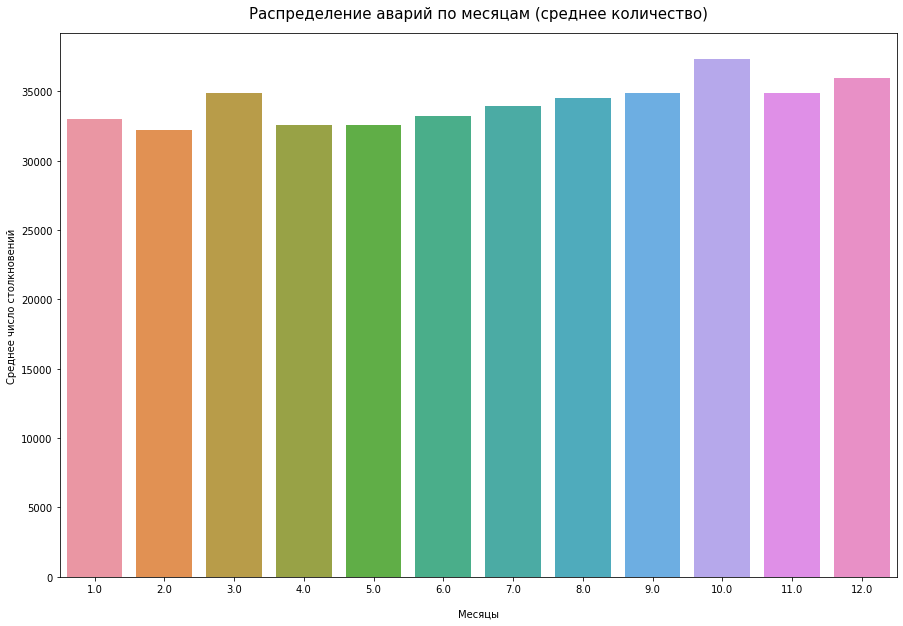

In [16]:
plt.figure(figsize=(15, 10))
sns.barplot(x=df_grouped['collision_month'], y=df_grouped['count_collisions'])
plt.xlabel('Месяцы', labelpad=15)
plt.ylabel('Среднее число столкновений')
plt.title('Распределение аварий по месяцам (среднее количество)', fontsize=15, pad=15)
plt.show()

Получается, у нас ситуация с авариями в каждый месяц примерно одинаковая, абсолютные значения меняются в пределах погрешности. В среднем количество аварий каждый месяц - это 34 000.

In [17]:
del df_grouped, df

### Аналитические задачи для коллег 

1) Проанализировать распределение числа происшествий в зависимости от времени суток(таблица `collisions`);

2) Определить наиболее частый тип дороги, где происходят происшествия (таблица `collisions`);

3) Рассмотреть влияние погоды на частоту происшествий (таблица `collisions`);

4) Выявить наиболее частовстречаемые факторы аварий (таблица `collisions`);

5) Проследить за числом ДТП в зависимости от состояния дороги (таблица `collisions`);

6) Проверить, есть ли зависимость между возрастом автомобиля и частотой аварий (таблица `vehicles`).

7) Проведите анализ взаимосвязи виновности между возрастом авто и числом происшествий  при условии, что водитель виноват (связать `parties` и `vehicles`);
- Создать sql-запрос с объединением таблиц `parties` и `vehicles`, в котором должна быть произведена группировка по возрасту авто `VEHICLE_AGE` и посчитано число вхождений записей в каждую категорию;
- Вывести полученную сводную таблицу в виде столбчатой гистограммы;
- Сделать вывод.

8) Проведите анализ влияния уровня трезвости виновника на серьёзность происшествия (связать `collisions` и `parties`);
- Создайте sql-запрос с объединением таблиц `collisions` и `parties`;
- Создайте сводную таблицу по полям `PRIMARY_COLL_FACTOR` и `PARTY_SOBRIETY`;
- Подсчитайте число значений в каждой из групп;
- Построить barplot;
- Сделать вывод о корелляции между трезвостью и причиной аварии.

#### Решения для двух аналитических задач

#####  1) Анализ взаимосвязи виновности между возрастом авто и числом происшествий при условии, что водитель виноват

In [18]:
query = '''
WITH temporary_table AS
(
    SELECT v.VEHICLE_AGE AS age,
           SUM(p.AT_FAULT) AS count_causers,
           COUNT(p.AT_FAULT) AS total_participant
    FROM parties AS p
    JOIN vehicles AS v ON v.case_id=p.case_id
    WHERE v.VEHICLE_AGE IS NOT NULL AND v.VEHICLE_AGE<20
    GROUP BY v.VEHICLE_AGE
)

SELECT age,
       count_causers,
       total_participant,
       CAST(count_causers AS FLOAT) / total_participant AS procent_causers
FROM temporary_table
''' 

df = pd.read_sql_query(query, con=engine)
df

,age,count_causers,total_participant,procent_causers
0,0,37861,89759,0.421807
1,1,38641,91383,0.422847
2,2,100194,222730,0.449845
3,3,168821,369722,0.456616
4,4,118210,268330,0.440540
5,5,98448,228606,0.430645
6,6,78864,184367,0.427756
7,7,78734,183937,0.428049
8,8,71846,168048,0.427533
9,9,54132,126711,0.427208


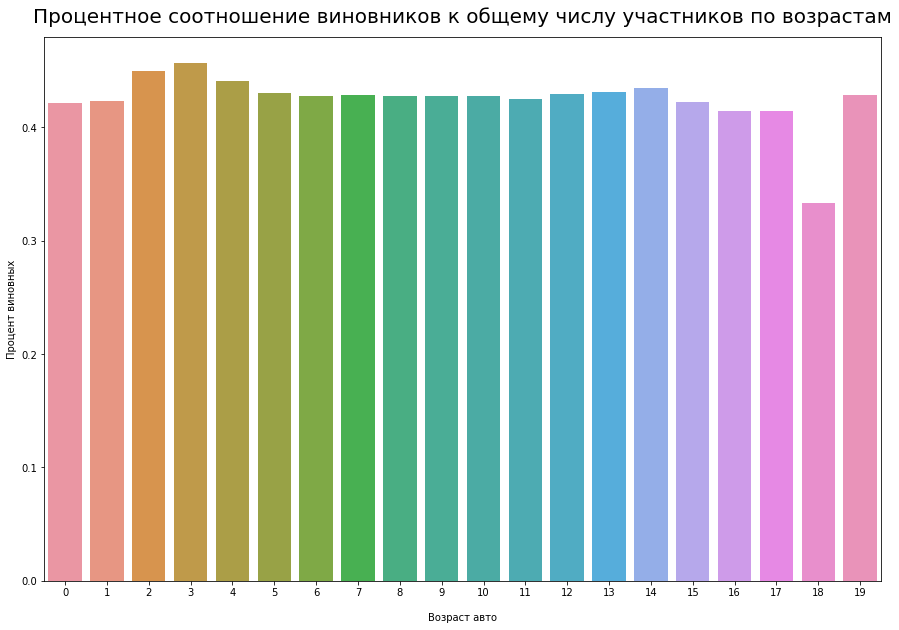

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df, x="age", y="procent_causers")
plt.xlabel('Возраст авто', labelpad=15)
plt.ylabel('Процент виновных')
plt.title('Процентное соотношение виновников к общему числу участников по возрастам', fontsize=20, pad=15)
plt.show()

Судя по полученому распределению видно, что от возраста автомобиля число аварий не сильно зависит, однако такая картина может быть обуcловлена маленьким числом старых авто, из-за чего может показаться, что распределение не изменяется. Также видны пики, приходящиеся на 2-4 года (автомобили этого возраста самые многочисленные) и резкая просадка процента в 18 лет (слишком маленькое число наблюдений, всего 3).

In [20]:
del df

##### 2) Исследование влияния уровня трезвости виновника на серьёзность происшествия

In [21]:
query = '''
SELECT p.PARTY_SOBRIETY, 
       c.COLLISION_DAMAGE
FROM parties AS p
JOIN collisions AS c ON c.case_id=p.case_id
WHERE c.COLLISION_DAMAGE IS NOT NULL 
      AND p.AT_FAULT=1
      AND p.PARTY_SOBRIETY IS NOT NULL 
'''

df = pd.read_sql_query(query, con=engine)
df

,party_sobriety,collision_damage
0,had not been drinking,scratch
1,had not been drinking,fatal
2,impairment unknown,middle damage
3,"had been drinking, under influence",small damage
4,had not been drinking,scratch
...,...,...
1259282,"had been drinking, under influence",scratch
1259283,had not been drinking,small damage
1259284,had not been drinking,severe damage
1259285,had not been drinking,small damage


In [22]:
table = pd.pivot_table(df, 
                       index='party_sobriety', 
                       columns='collision_damage', 
                       aggfunc=len,  # Используйте len вместо 'size'
                       margins=True, 
                       margins_name='Total')

table

collision_damage,fatal,middle damage,scratch,severe damage,small damage,Total
party_sobriety,,,,,,
"had been drinking, impairment unknown",319,1893,2194,875,11771,17052
"had been drinking, not under influence",207,2193,2702,445,6397,11944
"had been drinking, under influence",3174,20905,15245,5637,60985,105946
had not been drinking,5013,115380,270466,17756,520205,928820
impairment unknown,1058,9597,23931,2925,145213,182724
not applicable,17,1336,3274,220,7954,12801
Total,9788,151304,317812,27858,752525,1259287


In [23]:
#функция для нормализации строк
def normalize_row(row):
    total = row['Total']
    return (row / total * 100).round().astype('int')


normalized_table = table.apply(normalize_row, axis=1).drop(columns=['Total'], index=['Total'])

display(normalized_table)

collision_damage,fatal,middle damage,scratch,severe damage,small damage
party_sobriety,,,,,
"had been drinking, impairment unknown",2,11,13,5,69
"had been drinking, not under influence",2,18,23,4,54
"had been drinking, under influence",3,20,14,5,58
had not been drinking,1,12,29,2,56
impairment unknown,1,5,13,2,79
not applicable,0,10,26,2,62


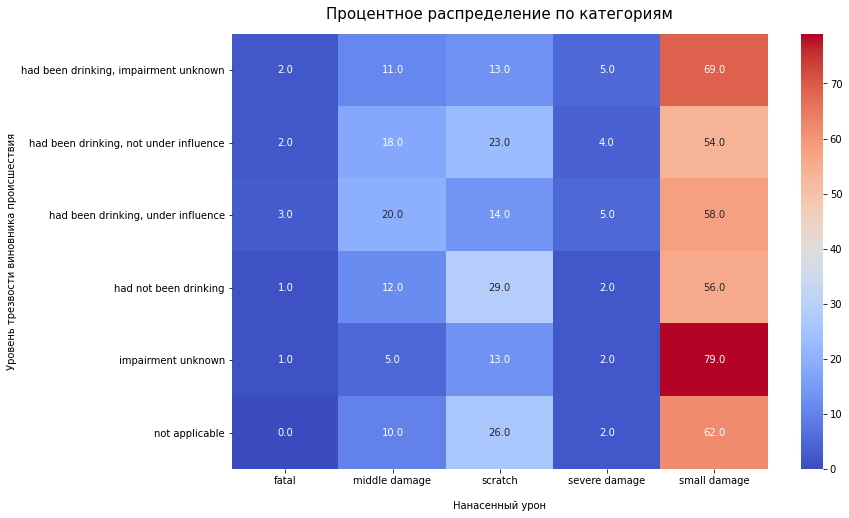

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_table, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Процентное распределение по категориям', fontsize=15, pad=15)
plt.ylabel('Уровень трезвости виновника происшествия')
plt.xlabel('Нанасенный урон', labelpad=15)
plt.show()


Судя по матрице корреляций видно, что для водителей, которые не в состоянии алкогольного опьянения, наиболее свойственны царапины и небольшой урон. А вот в случае, когда человек выпивал, проценты фатального, серьёзного и среднего урона увеличиваются в разы в сравнении с трезвыми виновниками. Получается, что между уровнем трезвости и нанесенным ущербом есть прямая корреляция, что логично.

In [25]:
del df, table, normalized_table, 

## Создайте модель для оценки водительского риска

### Выгрузка общего датасета

In [26]:
query = '''
WITH temporary_table AS
(
    SELECT p.*, 
           v.VEHICLE_TYPE, 
           v.VEHICLE_TRANSMISSION,
           v.VEHICLE_AGE
    FROM parties AS p
    JOIN vehicles AS v ON p.CASE_ID = v.CASE_ID AND p.PARTY_NUMBER = v.PARTY_NUMBER
    WHERE p.PARTY_TYPE = 'car'
)

SELECT *
FROM temporary_table AS t_t
JOIN collisions AS c ON c.CASE_ID = t_t.CASE_ID
WHERE c.COLLISION_DAMAGE != 'scratch'
      AND EXTRACT(YEAR FROM c.COLLISION_DATE) = 2012
''' 

common_data_frame = pd.read_sql_query(query, con=engine)

In [27]:
get_data_info(common_data_frame)

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,...,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
32722,2752058,5668189,1,car,1,68.0,had not been drinking,None,0.0,coupe,...,vehicle code violation,speeding,hit object,fixed object,dry,normal,daylight,none,2012-06-03,17:40:00
11208,2633058,5586147,2,car,0,19.0,had not been drinking,None,NaN,coupe,...,vehicle code violation,automobile right of way,broadside,other motor vehicle,dry,normal,dark with no street lights,functioning,2012-04-05,20:25:00
50799,2485240,5497192,1,car,0,44.0,had not been drinking,None,0.0,sedan,...,other than driver,other than driver (or pedestrian),other,non-collision,dry,normal,daylight,none,2012-01-01,11:55:00
27694,2523189,5517809,3,car,0,67.0,had not been drinking,None,0.0,sedan,...,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,functioning,2012-02-13,13:25:00
55422,2689169,5617764,2,car,0,22.0,had not been drinking,None,0.0,sedan,...,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2012-05-10,18:01:00
5957,2547389,5530693,1,car,1,19.0,had not been drinking,None,0.0,coupe,...,vehicle code violation,speeding,rear end,other motor vehicle,wet,normal,daylight,none,2012-03-01,11:03:00
53880,2686155,5616190,1,car,1,62.0,had not been drinking,None,1.0,coupe,...,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,functioning,2012-04-24,14:18:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           56248 non-null  int64  
 1   case_id                      56248 non-null  object 
 2   party_number                 56248 non-null  int64  
 3   party_type                   56248 non-null  object 
 4   at_fault                     56248 non-null  int64  
 5   insurance_premium            55701 non-null  float64
 6   party_sobriety               55376 non-null  object 
 7   party_drug_physical          2857 non-null   object 
 8   cellphone_in_use             51777 non-null  float64
 9   vehicle_type                 56248 non-null  object 
 10  vehicle_transmission         55389 non-null  object 
 11  vehicle_age                  54554 non-null  float64
 12  case_id                      56248 non-null  object 
 13  county_city_loca

None

,id,case_id,party_number,party_type,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,vehicle_type,...,primary_collision_factor,pcf_violation_category,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,collision_date,collision_time
count,5.624800e+04,56248,56248.000000,56248,56248.000000,55701.000000,55376,2857,51777.000000,56248,...,56137,55482,55940,56086,55900,55999,56094,56033,56248,56160
unique,NaN,44832,NaN,1,NaN,NaN,6,5,NaN,3,...,5,22,7,9,4,8,5,4,366,1435
top,NaN,5542351,NaN,car,NaN,NaN,had not been drinking,G,NaN,sedan,...,vehicle code violation,speeding,rear end,other motor vehicle,dry,normal,daylight,none,2012-03-17,15:00:00
freq,NaN,8,NaN,56248,NaN,NaN,48577,1238,NaN,37180,...,53915,18241,18766,41200,50242,54066,38064,37578,571,413
mean,2.594616e+06,NaN,1.527432,NaN,0.504427,37.607170,NaN,NaN,0.020357,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.877649e+04,NaN,0.662507,NaN,0.499985,16.328721,NaN,NaN,0.141218,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.800807e+06,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.517333e+06,NaN,1.000000,NaN,0.000000,24.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.598362e+06,NaN,1.000000,NaN,1.000000,34.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.681091e+06,NaN,2.000000,NaN,1.000000,49.000000,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Отчистка датафрейма от неинформативных признаков

### Будем использовать в обучении модели: 

- `party_sobriety`,  Трезвость участника (точно влияет). Таблица parties.


- `party_drug_physical`, Состояние участника: физическое или с учётом принятых лекарств (точно влияет). Таблица parties.


- `cellphone_in_use`,  Наличие телефона в автомобиле (точно влияет). Таблица parties.


- `vehicle_type`,  Тип кузова (возможно, влияет). Таблица vehicles.           


- `vehicle_transmission`,  Тип КПП (возможно, влияет). Таблица vehicles.


- `vehicle_age`,  Возраст автомобиля (в годах). Таблица vehicles.


- `distance`,  Расстояние от главной дороги (метры). Неизвестный до происшествия признак.Таблица collisions. С его помощью восстановим пропуски в location_type.


- `county_location`, названия географических районов, где произошло ДТП (возможно, влияет). Таблица collisions.


- `weather_1`,  Погода (влияет). Таблица collisions.  


- `location_type`,  Тип дороги (влияет). Таблица collisions.


- `intersection`, Является ли место происшествие перекрёстком (влияет). Таблица collisions. Данная фича дублирует `location_type`, однако она может помочь в заполнении пропусков для 'location_type'.


- `road_surface`, Состояние дороги (точно влияет). Таблица collisions. 


- `road_condition_1`, Дорожное состояние (точно влияет). Таблица collisions.


- `lighting`, Освещение (влияет). Таблица collisions.        


- `collision_date`, Дата происшествия (влияют только месяцы и дни, так как мы рассматриваем только 2012 год)   


- `collision_time`, Время происшествия (влияют толька часы)

    
- `at_fault`, Виновность участника происшествия. Таблица parties. Целевой признак.

    
### Не будем использовать:  

- `id`, Номер в таблице. Не несет в себе практической пользы, так как является просто номером записи. Таблица parties


- `case_id`, Уникальный номер для зарегистрированного происшествия в таблице происшествий. Не несет в себе практической пользы, так как является просто id-шником записи. Таблицы parties, collisions, vehicles 

- `party_number`, Номер участника происшествия. Не нужен, так как является малоинформативным и не стрктурированным.


- `insurance_premium`, Сумма страховки (тыс. долларов). Таблица parties. Не влияет на результаты модели, так как страховка выплачивается постфактум.


- `party_type`, Тип участника происшествия. Таблица parties. Нам он не нужен, так как мы рассатриваем только тип 'Car'.


- `county_city_location`, Номер географических районов, где произошло ДТП. Таблица collisions. Можно удалить, так как дублирует столбец `county_location`.


- `collision_damage`, Серьёзность происшествия. Неизвестный до происшествия признак. Таблица collisions.  


- `party_count`, Количество участников. Неизвестный до происшествия признак. Таблица collisions.


- `primary_collision_factor`, Основной фактор аварии. Неизвестный до происшествия признак. Таблица collisions. Однако мы будем использовать данный признак в заполнении пропусков в `party_drug_physical`.


- `pcf_violation_category`, Категория нарушения. Неизвестный до происшествия признак. Таблица collisions. Однако мы будем использовать данный признак в заполнении пропусков в `party_sobriety` и `party_drug_physical`.


- `type_of_collision`, Тип аварии. Неизвестный до происшествия признак. Таблица collisions.      


- `motor_vehicle_involved_w`, Дополнительные участники ДТП. Неизвестный до происшествия признак. Таблица collisions.


- `control_device`, Устройство управления. Неизвестный до происшествия признак. Таблица collisions.

In [28]:
columns = [        
    'party_sobriety', 
    'party_drug_physical',
    'pcf_violation_category', #потом удалим, т.к. используем его только для заполнения пропусков
    'primary_collision_factor', #потом удалим, т.к. используем его только для заполнения пропусков
    'insurance_premium',
    'cellphone_in_use', 
    'vehicle_type',     
    'vehicle_transmission', 
    'vehicle_age', 
    'direction',
    'distance', 
    'county_location',                                         
    'location_type', 
    'intersection', 
    'weather_1', 
    'road_surface', 
    'road_condition_1', 
    'lighting', 
    'collision_date', 
    'collision_time',
    'control_device', 
    'at_fault' 
]

In [29]:
data = common_data_frame[columns].copy()

In [30]:
del common_data_frame

### Обработка данных

In [31]:
get_data_info(data)

,party_sobriety,party_drug_physical,pcf_violation_category,primary_collision_factor,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,direction,...,location_type,intersection,weather_1,road_surface,road_condition_1,lighting,collision_date,collision_time,control_device,at_fault
1149,had not been drinking,None,unsafe lane change,vehicle code violation,18.0,0.0,sedan,auto,6.0,north,...,highway,0.0,cloudy,wet,normal,daylight,2012-04-13,16:45:00,none,1
38776,had not been drinking,None,speeding,vehicle code violation,50.0,0.0,sedan,manual,2.0,west,...,highway,0.0,clear,dry,normal,daylight,2012-04-10,17:25:00,none,1
21540,had not been drinking,None,speeding,vehicle code violation,41.0,0.0,sedan,auto,2.0,east,...,None,0.0,clear,dry,normal,daylight,2012-05-05,15:45:00,functioning,0
1920,had not been drinking,None,speeding,vehicle code violation,9.0,0.0,sedan,auto,1.0,west,...,highway,0.0,raining,wet,normal,daylight,2012-03-16,18:01:00,none,1
26345,had not been drinking,None,traffic signals and signs,vehicle code violation,20.0,NaN,sedan,auto,3.0,None,...,None,1.0,clear,dry,normal,dark with street lights,2012-01-07,19:48:00,functioning,1
34914,had not been drinking,None,automobile right of way,vehicle code violation,20.0,0.0,coupe,auto,3.0,None,...,None,1.0,clear,dry,normal,daylight,2012-02-22,15:24:00,functioning,0
32637,None,sleepy/fatigued,improper turning,vehicle code violation,63.0,0.0,coupe,manual,10.0,west,...,None,0.0,clear,dry,normal,daylight,2012-05-20,15:15:00,none,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   party_sobriety            55376 non-null  object 
 1   party_drug_physical       2857 non-null   object 
 2   pcf_violation_category    55482 non-null  object 
 3   primary_collision_factor  56137 non-null  object 
 4   insurance_premium         55701 non-null  float64
 5   cellphone_in_use          51777 non-null  float64
 6   vehicle_type              56248 non-null  object 
 7   vehicle_transmission      55389 non-null  object 
 8   vehicle_age               54554 non-null  float64
 9   direction                 43230 non-null  object 
 10  distance                  56248 non-null  float64
 11  county_location           56248 non-null  object 
 12  location_type             25932 non-null  object 
 13  intersection              56073 non-null  float64
 14  weathe

None

,party_sobriety,party_drug_physical,pcf_violation_category,primary_collision_factor,insurance_premium,cellphone_in_use,vehicle_type,vehicle_transmission,vehicle_age,direction,...,location_type,intersection,weather_1,road_surface,road_condition_1,lighting,collision_date,collision_time,control_device,at_fault
count,55376,2857,55482,56137,55701.000000,51777.000000,56248,55389,54554.000000,43230,...,25932,56073.000000,56080,55900,55999,56094,56248,56160,56033,56248.000000
unique,6,5,22,5,NaN,NaN,3,2,NaN,4,...,3,NaN,7,4,8,5,366,1435,4,NaN
top,had not been drinking,G,speeding,vehicle code violation,NaN,NaN,sedan,manual,NaN,north,...,highway,NaN,clear,dry,normal,daylight,2012-03-17,15:00:00,none,NaN
freq,48577,1238,18241,53915,NaN,NaN,37180,29318,NaN,12129,...,21323,NaN,45092,50242,54066,38064,571,413,37578,NaN
mean,NaN,NaN,NaN,NaN,37.607170,0.020357,NaN,NaN,4.856472,NaN,...,NaN,0.221533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.504427
std,NaN,NaN,NaN,NaN,16.328721,0.141218,NaN,NaN,3.234503,NaN,...,NaN,0.415282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499985
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,24.000000,0.000000,NaN,NaN,3.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,34.000000,0.000000,NaN,NaN,4.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,49.000000,0.000000,NaN,NaN,7.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Как видно, из полученной информации по нашей таблице:

1) Необходимо привести к нужному типу дату `collision_date`, время `collision_time`  и подготовить их для модели (разделив на несколько столбцов). Однако это лучше сделать после заполнения пропусков в `date_time`, так как при преобразовывании из строки в `datetime64` будет выдавать ошибку несовпадения формата.

2) В столбце `party_drug_physical` практически полностью отсутствует информация (более 90% None'ов). Однако, учитывая тот факт, что данная информация может очень сильно повлиять на результаты модели, лучше оставить данный столбец. А Nan'ы заменить на константное значение.

3) Так же лучше всего будет привести `at_fault`, `intersection` и `cellphone_in_use` к булеву типу для наглядности предоставляемой информации.  

In [32]:
# определим категориальные, числовые и временные столбцы

CATEGORY_COLUMNS = [
    'party_sobriety',
    'party_drug_physical',
    'pcf_violation_category', #потом удалим, т.к. используем его только для заполнения пропусков
    'primary_collision_factor', #потом удалим, т.к. используем его только для заполнения пропусков
    'vehicle_type',
    'vehicle_transmission',
    'county_location',
    'weather_1',
    'location_type',
    'road_surface',
    'road_condition_1',
    'lighting', 
    'intersection', 
    'cellphone_in_use',
    'direction',
    'control_device',
    'at_fault'
]

NUMERIC_COLUMNS = [ 
    'vehicle_age',
    'insurance_premium',
    'distance'
]

DATETIME_COLUMNS = [
    'collision_date',
    'collision_time'
]

for col in ['intersection', 'cellphone_in_use', 'at_fault']:
    data[col]=data[col].astype('bool')
    
CATEGORY_COLUMNS.remove('at_fault') #удалим, так как это у нас целевая метка

In [33]:
# преобразуем наши дату и время в тип datetime64
data.collision_date = pd.to_datetime(
    data.collision_date, 
    format='%Y-%m-%d'
)

data.collision_time = pd.to_datetime(
    data.collision_time, 
    format='%H:%M:%S'
)

# создадим переменные, которые будут хранить в себе месяц, день, часы и минуты
data['collision_month'] = data.collision_date.dt.month
data['collision_day'] = data.collision_date.dt.day
data['collision_hour'] = data.collision_time.dt.hour

# добавим новоиспеченные переменные в массив с числовыми фичами
CATEGORY_COLUMNS.extend(['collision_month', 'collision_day', 'collision_hour'])

#удалим переменные с datetime
data = data.drop(columns=['collision_date', 'collision_time'])

In [34]:
print(f'Категориальные и булевы столбцы: \n{CATEGORY_COLUMNS}\n')

print(f"Числовые столбцы: \n{NUMERIC_COLUMNS}")

Категориальные и булевы столбцы: 
['party_sobriety', 'party_drug_physical', 'pcf_violation_category', 'primary_collision_factor', 'vehicle_type', 'vehicle_transmission', 'county_location', 'weather_1', 'location_type', 'road_surface', 'road_condition_1', 'lighting', 'intersection', 'cellphone_in_use', 'direction', 'control_device', 'collision_month', 'collision_day', 'collision_hour']

Числовые столбцы: 
['vehicle_age', 'insurance_premium', 'distance']


#### Очистка данных от дубликатов

Данную процедуру лучше делать вначале перед сплитом данных по той причине, что если это делать после, то могут появиться дубликаты из тренировочной и валидационной/тестовой выборок, а это увеличит оценку нашей модели, хотя ее репрезентативность будет ниже по уровню.

Для начала приведем все записи к нижнему регистру и проверим, какие уникальные значения есть в каждом из столбцов. Тем самым, нам будет легче вычислить и подтправить неявные дубликаты. А после уже проверим наши данные на явные дубликаты и удалим их, чтобы не ухудшать нашу модель.

In [35]:
for column in CATEGORY_COLUMNS:
    if column not in ['intersection', 'cellphone_in_use', 'collision_month', 'collision_day', 'collision_hour']:
        data[column] = data[column].str.lower()
        if column == 'county_location':
            print(f'Столбец {column.upper()}: \n {np.sort(data[column].unique())}\n')
        else:
            print(f'Столбец {column.upper()}: \n {data[column].unique()}\n')

Столбец PARTY_SOBRIETY: 
 ['had not been drinking' 'had been drinking, not under influence'
 'had been drinking, under influence' None 'impairment unknown'
 'had been drinking, impairment unknown' 'not applicable']

Столбец PARTY_DRUG_PHYSICAL: 
 [None 'under drug influence' 'sleepy/fatigued' 'g' 'impairment - physical'
 'not applicable']

Столбец PCF_VIOLATION_CATEGORY: 
 ['automobile right of way' 'dui' 'improper turning' 'speeding'
 'other than driver (or pedestrian)' 'traffic signals and signs' 'unknown'
 'other hazardous violation' 'unsafe lane change' None
 'wrong side of road' 'unsafe starting or backing'
 'pedestrian right of way' 'improper passing' 'pedestrian violation'
 'following too closely' 'other improper driving' 'other equipment'
 'impeding traffic' 'hazardous parking' 'brakes' 'fell asleep' 'lights']

Столбец PRIMARY_COLLISION_FACTOR: 
 ['vehicle code violation' 'other than driver' 'unknown'
 'other improper driving' None 'fell asleep']

Столбец VEHICLE_TYPE: 
 ['seda

In [36]:
for column in NUMERIC_COLUMNS:
    print(f'Столбец {column.upper()}: \n {np.sort(data[column].unique())}\n')

Столбец VEHICLE_AGE: 
 [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  19. 161.  nan]

Столбец INSURANCE_PREMIUM: 
 [  0.   2.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.
 100. 101. 102. 105.  nan]

Столбец DISTANCE: 
 [0.0000e+00 1.0000e+00 1.1000e+00 ... 1.2408e+05 1.7160e+05 1.5840e+06]



- Обнаружены выбросы для возраста авто `VEHICLE_AGE`. Также можно будет удалить записи с теми авто, возраст которых более 10 лет, так как каршеринговые компании не используют столь старые авто по причине дорогого обслуживания из-за более частых поломок и устаревания конструкции.
- Столбец `CONTROL_DEVICE` содержит неявные дубликаты как строковые `none` и пропущеное значение `None`, в контексте данной фичи они имеют одинаковый смысл, поэтому будем заполнять пропуски в данном столбце константным значением `none`.

In [37]:
#удаление старых авто
data = data.loc[~(data['vehicle_age'] > 10)]

#избавление от неявных дублей
data['control_device'] = data['control_device'].fillna(value='none')

print(f"Уникальные значения в {data[['vehicle_age']].value_counts()}\n")
print(f"Уникальные значения в {data[['control_device']].value_counts()}\n")

Уникальные значения в vehicle_age
3.0            11012
4.0             7157
2.0             6048
5.0             5565
6.0             3940
7.0             3838
8.0             3509
0.0             3087
9.0             2770
1.0             2545
10.0            1942
dtype: int64

Уникальные значения в control_device 
none               35923
functioning        17045
not functioning      110
obscured              29
dtype: int64



In [38]:
print(data.duplicated().sum())

25


In [39]:
print(f"Было дубликатов: {data.duplicated().sum()}")
#удалим явные дубликаты
data = data.drop_duplicates()
print(f"Стало: {data.duplicated().sum()}")

Было дубликатов: 25
Стало: 0


### Обработка данных

interval columns not set, guessing: ['insurance_premium', 'vehicle_age', 'distance', 'collision_month', 'collision_day', 'collision_hour']


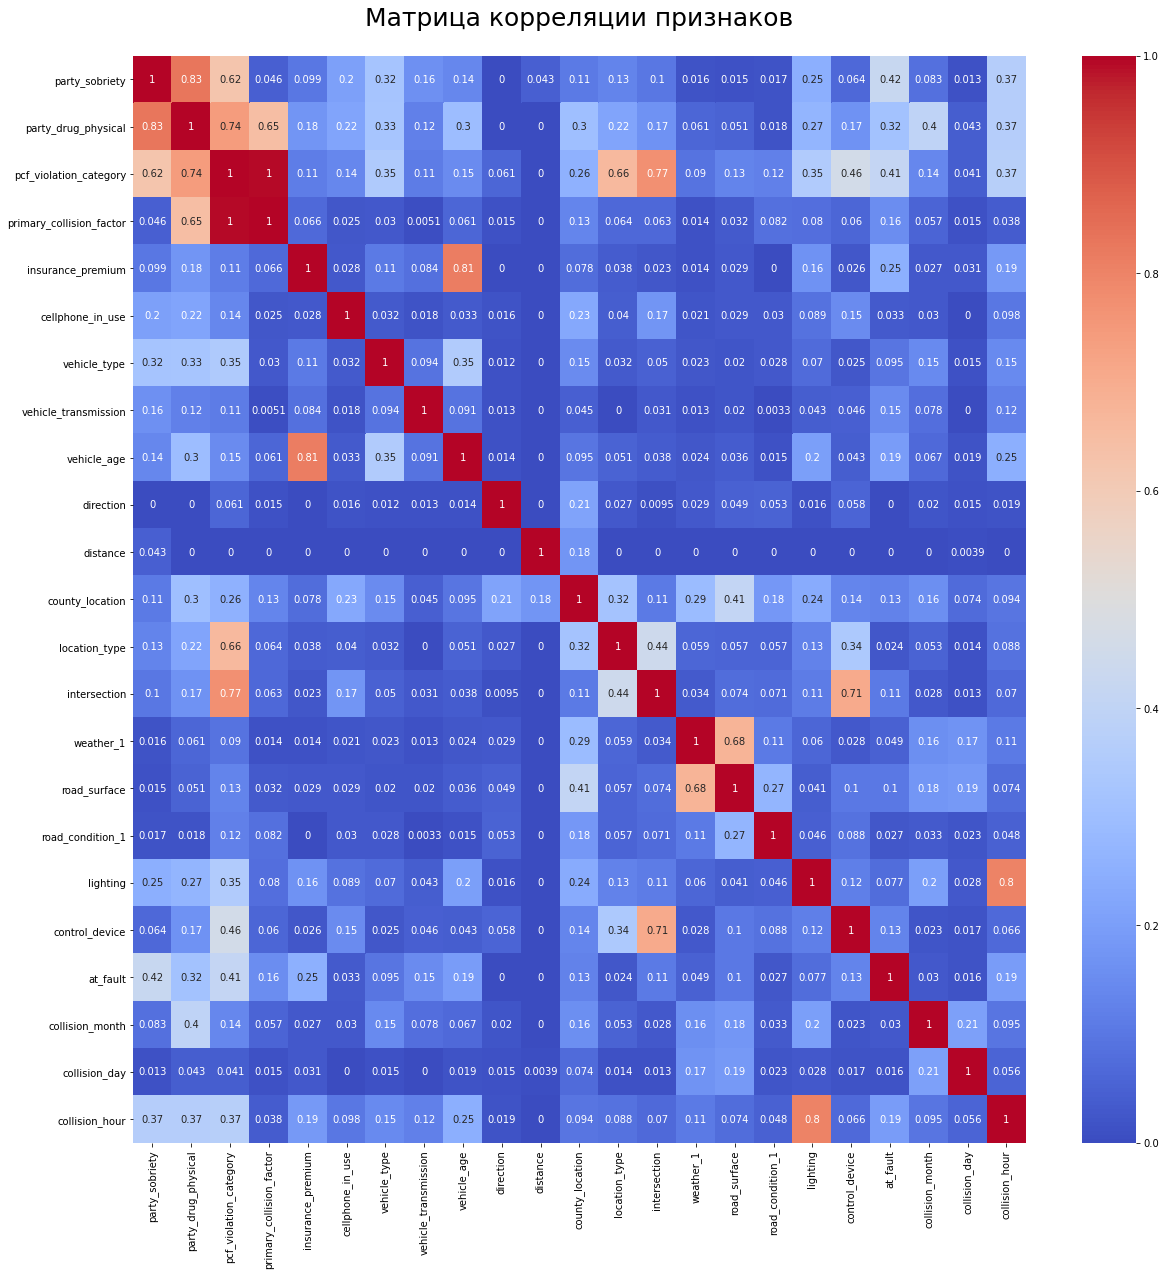

In [40]:
corr_matrix = data.phik_matrix()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции признаков', fontsize=25, pad=30)
plt.show()

#### Анализ распределений данных

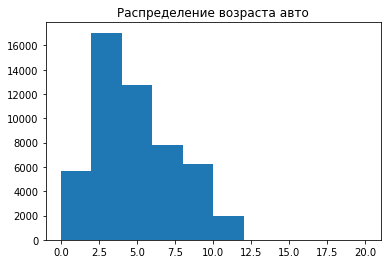

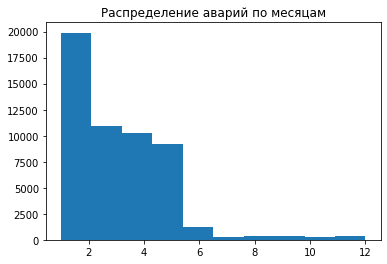

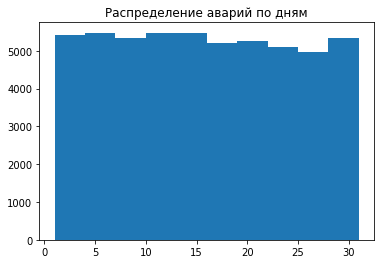

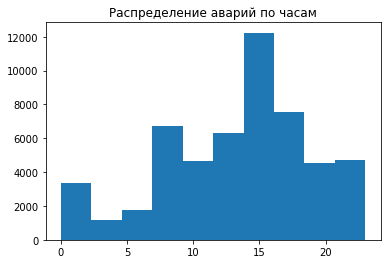

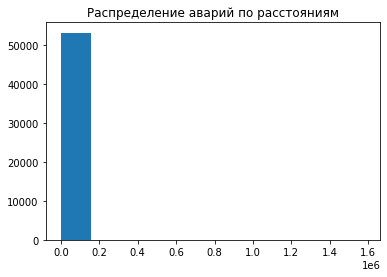

In [41]:
plt.title('Распределение возраста авто')
plt.hist(data.vehicle_age, range=(0,20))
plt.show()

plt.title('Распределение аварий по месяцам')
plt.hist(data.collision_month)
plt.show()

plt.title('Распределение аварий по дням')
plt.hist(data.collision_day)
plt.show()

plt.title('Распределение аварий по часам')
plt.hist(data.collision_hour)
plt.show()

plt.title('Распределение аварий по расстояниям')
plt.hist(data.distance)
plt.show()

- По данным распределениям видно, что аварии чаще всего происходят в зимне-весенний период и в часы пик. 

- Также наиболее часто в аварии попадают авто возрастом 3-4 года, но это не является правилом или критерием для вероятности аварии, так как таких авто просто количественно больше, чем новинок или старых авто.

#### Категориальные столбцы

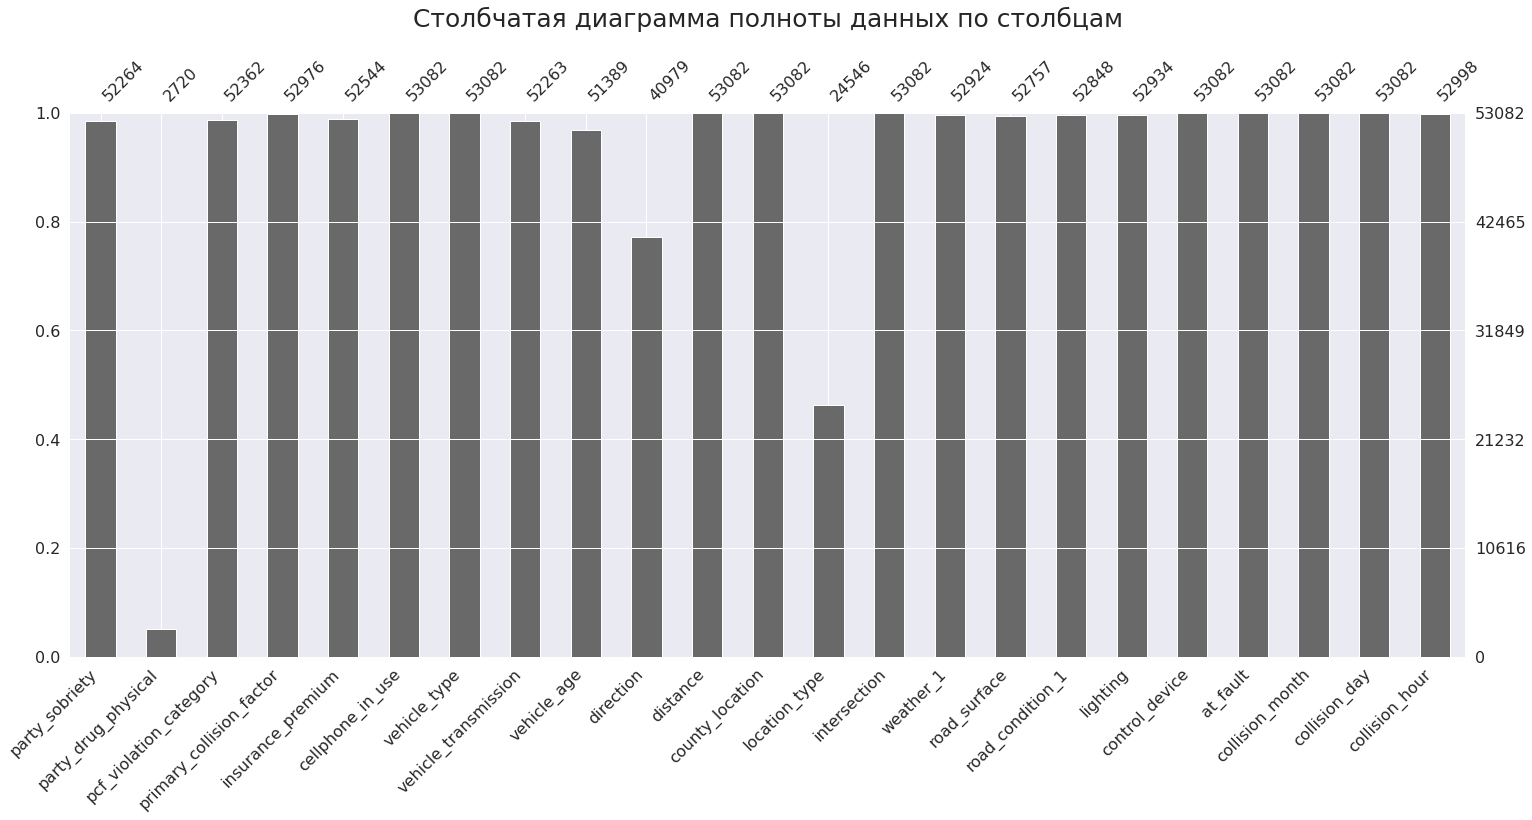

In [42]:
sns.set()
msno.bar(data)
plt.title('Столбчатая диаграмма полноты данных по столбцам', fontsize=25, pad=30)
plt.show()

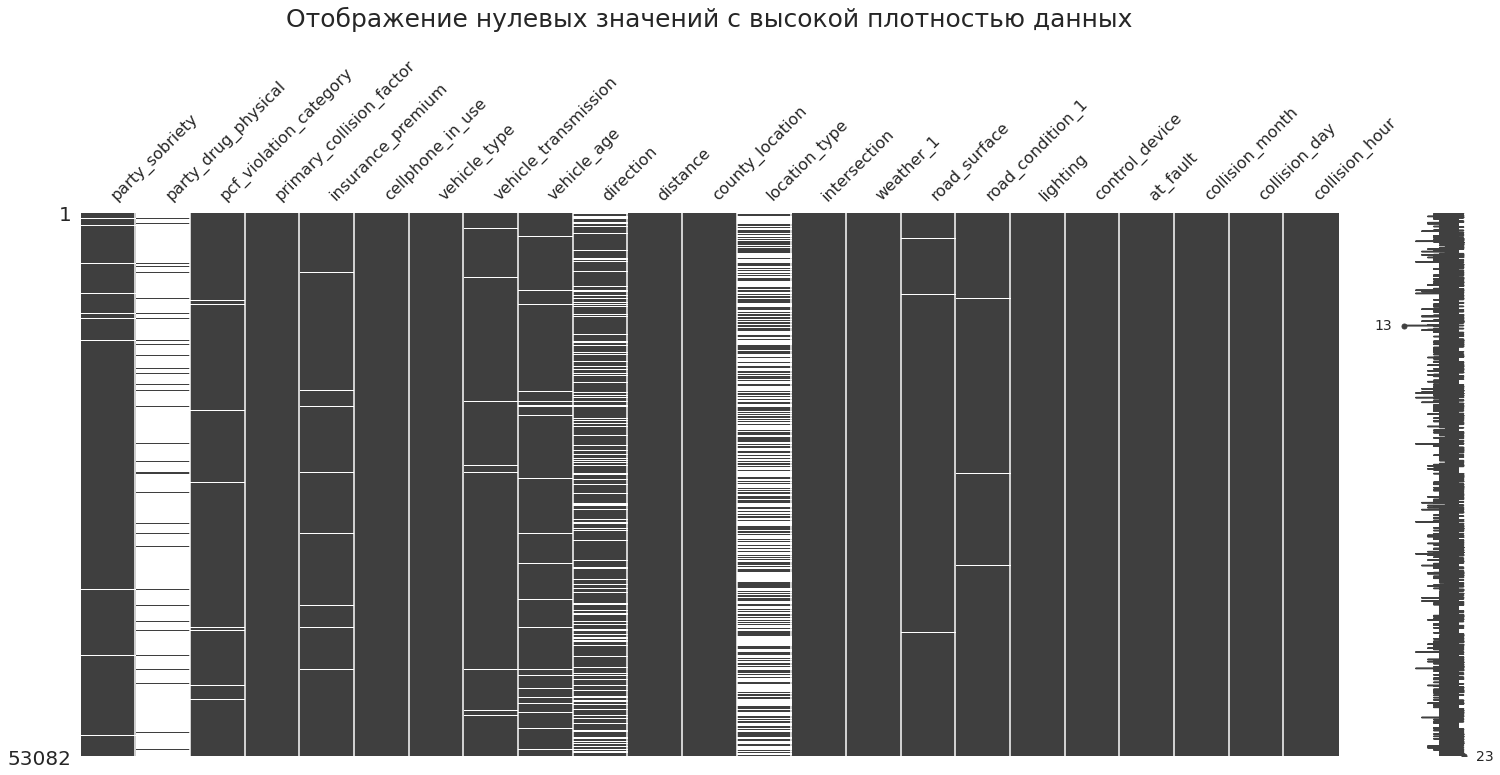

In [43]:
msno.matrix(data)
plt.title('Отображение нулевых значений с высокой плотностью данных', fontsize=25, pad=30)
plt.show()

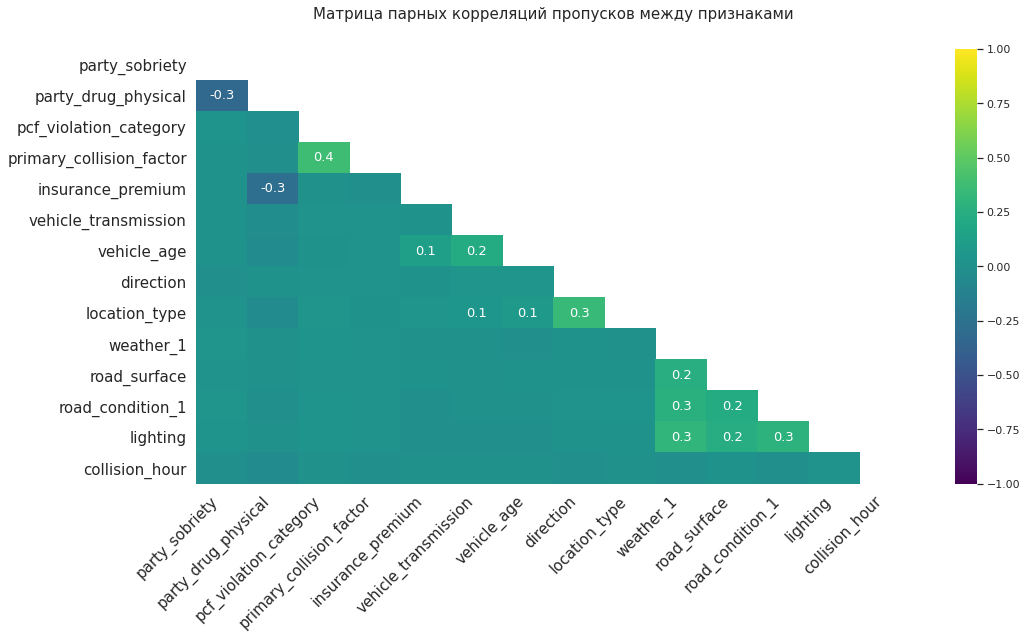

In [44]:
msno.heatmap(data, figsize=(16,8), cmap="viridis", fontsize=15)
plt.title('Матрица парных корреляций пропусков между признаками', fontsize=15, pad=30)
plt.show()

По данной матрице корреляций видно, что почти везде пропуски имеют случайную природу, кроме столбцов с отрицательной корреляцией, которая говорит о том, что если в одном столбце пропуск, значит в другом столбце пропуска нет, а именно это касается столбцов `party_sobrierty`, `party_drug_physical` и `insurance_premium`.

In [45]:
print(f"Пропуски в каждом столбце\n\n{data.isna().sum()}")

Пропуски в каждом столбце

party_sobriety                818
party_drug_physical         50362
pcf_violation_category        720
primary_collision_factor      106
insurance_premium             538
cellphone_in_use                0
vehicle_type                    0
vehicle_transmission          819
vehicle_age                  1693
direction                   12103
distance                        0
county_location                 0
location_type               28536
intersection                    0
weather_1                     158
road_surface                  325
road_condition_1              234
lighting                      148
control_device                  0
at_fault                        0
collision_month                 0
collision_day                   0
collision_hour                 84
dtype: int64


##### Обработка `party_sobriety`  и `party_drug_physical`

Данные столбцы мы будем аналиировать вместе и пропуски заполять в них тоже вместе, так как из логики и корреляционной матрицы видно, что это сильно связанные друг с другом фичи, пропуски в которых можно заполнить только на основе их значений, т.е. другие признаки не несут в себе информации, которая могла бы помочь с заполнением miss value в них.

Так как трезвость и состояние участника движения являются максимально значимыми признаками, влияющими на частоту ДТП, то мы должны заполнить вручную пропуски в этих столбцах максимально точно. 

Если в данных присутствую записи, в которых None одновременно в обоих фичах, то такую запись лучше удалить, так как пропуски в ней будут заполнены модами при кросс-валидации, а это только ухудшит предсказательную способность нашей модели.

In [46]:
print(f'''Общее количество строк, которое необходимо удалить в связи с совместными пропусками в важных колонках
по физ.состоянию и степени опьянения водителя: {len(data.
                                                    loc[data['party_sobriety'].isna() & data['party_drug_physical'].isna(), 
                                                        ['party_sobriety', 'party_drug_physical']])}''')


Общее количество строк, которое необходимо удалить в связи с совместными пропусками в важных колонках
по физ.состоянию и степени опьянения водителя: 303


In [47]:
data = data[~(data['party_sobriety'].isna() & data['party_drug_physical'].isna())]

##### Пропуски в `party_sobriety`

Данный столбец показывает трезвость участника, а в столбце `pcf_violation_category` говорится о категориях нарушений, среди которых есть `dui` - вождение в алкогольном или наркотическом опьянении. Соответственно, мы можем использовать это в заполнении пропусков в нашем столбце.

In [48]:
print(f"В столбце `party_sobriety` осталось {data['party_sobriety'].isna().sum()} пропусков")

condition = data['pcf_violation_category']!='dui'

data.loc[
    condition, 'party_sobriety'
] = data.loc[
    condition, 'party_sobriety'
].fillna(value='had not been drinking')

print(f"В столбце `party_sobriety` осталось {data['party_sobriety'].isna().sum()} пропусков")

В столбце `party_sobriety` осталось 515 пропусков
В столбце `party_sobriety` осталось 264 пропусков


In [49]:
print(f"В столбце `party_sobriety` осталось {data['party_sobriety'].isna().sum()} пропусков")

condition = data['party_drug_physical']=='under drug influence'

data.loc[
    condition, 'party_sobriety'
] = data.loc[
    condition, 'party_sobriety'
].fillna(value='impairment unknown')

print(f"В столбце `party_sobriety` осталось {data['party_sobriety'].isna().sum()} пропусков")

В столбце `party_sobriety` осталось 264 пропусков
В столбце `party_sobriety` осталось 0 пропусков


In [50]:
data['party_sobriety']=data['party_sobriety'].fillna(value='had been drinking, under influence')
print(f"В столбце `party_sobriety` осталось {data['party_sobriety'].isna().sum()} пропусков")

В столбце `party_sobriety` осталось 0 пропусков


###### Пропуски в `party_drug_physical`

Так как между `party_sobriety` и `party_drug_physical` есть сильная зависимость и между `party_drug_physical` и целевой фичой `at_fault` тоже, слеодавтельно, лучше стоит заполнить большое количество пропусков в `party_drug_physical` основываясь на значениях из `party_sobriety`. 

In [51]:
print(f"Подсчет уникальных значений в {data[['party_drug_physical']].value_counts()}")

Подсчет уникальных значений в party_drug_physical  
g                        1191
under drug influence      827
sleepy/fatigued           367
not applicable            239
impairment - physical      96
dtype: int64


In [52]:
print(f"Подсчет уникальных значений в {data[['party_sobriety']].value_counts()}")

Подсчет уникальных значений в party_sobriety                        
had not been drinking                     45851
had been drinking, under influence         4423
impairment unknown                         1455
had been drinking, not under influence      557
had been drinking, impairment unknown       254
not applicable                              239
dtype: int64


In [53]:
data.groupby('party_sobriety')['party_drug_physical'].apply(lambda x: x.isnull().sum())

party_sobriety
had been drinking, impairment unknown       225
had been drinking, not under influence      518
had been drinking, under influence         4186
had not been drinking                     45130
impairment unknown                            0
not applicable                                0
Name: party_drug_physical, dtype: int64

In [54]:
print(f"В столбце `party_drug_physical` осталось {data['party_drug_physical'].isna().sum()} пропусков")

condition = (data['pcf_violation_category'] == 'dui') 
# & \ data['party_sobriety'].isin(['had not been drinking', 'impairment unknown', 'not applicable'])
data.loc[condition, 'party_drug_physical'] = data.loc[
    condition, 'party_drug_physical'
].fillna(value='under drug influence')

print(f"В столбце `party_drug_physical` осталось {data['party_drug_physical'].isna().sum()} пропусков")

condition = (data['pcf_violation_category']=='fell asleep')
data.loc[
    condition, 'party_drug_physical'
] = data.loc[
    condition, 'party_drug_physical'
].fillna(value='sleepy/fatigued')

print(f"В столбце `party_drug_physical` осталось {data['party_drug_physical'].isna().sum()} пропусков")

condition = (data['primary_collision_factor']=='fell asleep')
data.loc[
    condition, 'party_drug_physical'
] = data.loc[
    condition, 'party_drug_physical'
].fillna(value='sleepy/fatigued')

print(f"В столбце `party_drug_physical` осталось {data['party_drug_physical'].isna().sum()} пропусков")

condition = (data['pcf_violation_category'] != 'dui') 
data.loc[condition, 'party_drug_physical'] = data.loc[
    condition, 'party_drug_physical'
].fillna(value='g')

print(f"В столбце `party_drug_physical` осталось {data['party_drug_physical'].isna().sum()} пропусков")

data['party_drug_physical']=data['party_drug_physical'].fillna(value='not applicable')

print(f"В столбце `party_drug_physical` осталось {data['party_drug_physical'].isna().sum()} пропусков")

В столбце `party_drug_physical` осталось 50059 пропусков
В столбце `party_drug_physical` осталось 44525 пропусков
В столбце `party_drug_physical` осталось 44523 пропусков
В столбце `party_drug_physical` осталось 44523 пропусков
В столбце `party_drug_physical` осталось 0 пропусков
В столбце `party_drug_physical` осталось 0 пропусков


##### Пропуски в `direction`

Данных пропусков более 20%, однако чтобы заполнить их корректными значениями у нас не хватает данных, из которыx бы мы смогли достать информацию о направлении движения автомобиля. Плюс данный признак, судя по матрице корреляций вносит нулевой вклад в целевую переменную. 

Поэтому лучшим решением будет заполнить проспуски заглушкой `unknown`, так как даже при аренде автомобиля клиент может не всегда указать конечный пункт на навигаторе, либо же он может выбрать конечным пунктом пункт отправления, что затруднит определение направления движения. Однако данный момент необходимо лучше уточнять у коллег, так как в ТЗ задан следующий порядок действий клиента `водитель забронировал автомобиль, сел за руль и выбрал маршрут`.

In [55]:
data['direction'] = data['direction'].fillna(value='unknown')
print(f"В столбце `direction` осталось {data['direction'].isna().sum()} пропусков")

В столбце `direction` осталось 0 пропусков


##### Обработка значений в `intersection` и пропусков в `location_type`

В следующем блоке кода я хочу исправить несоответствия в столбцах `intersection` и `location_type`, то есть если в первой фиче указано `True`, а во второй тип локации не перекресток, то это ошибка при заполнении данных. 

Однако лучше, наверное, будет не трогать данные значения, потому что авария могла произойти на подъезде к перекрестку, поэтому в столбце `location_type` написали `ramp`, а в `intersection` указали `True`. Для более корректного заполнения необходимо уточнять у коллег, как собирались данные. 

In [56]:
print(data.loc[(data['intersection']==True) & (data['location_type']!='intersection')].shape[0])
print(data.loc[(data['intersection']==False) & (data['location_type']=='intersection')].shape[0])

10648
267


In [57]:
data.loc[(data['location_type'].isna()) & (data['intersection'] == True), 'location_type'] = 'intersection'
data.loc[(data['location_type'].isna()) & (data['intersection'] == False), 'location_type'] = 'unknown'

print(f"В столбце `direction` осталось {data['location_type'].isna().sum()} пропусков")

В столбце `direction` осталось 0 пропусков


In [58]:
print(f"Подсчет уникальных значений в {data[['location_type']].value_counts()}")

Подсчет уникальных значений в location_type
highway          20150
unknown          18309
intersection     11225
ramp              3095
dtype: int64


In [59]:
print(f"Подсчет уникальных значений в {data[['location_type']].value_counts()}\n")
print('Медианные значения расстояния от главной дороги для разных типов локаций:')
print(f"1)Для типа `перекрёсток`: {data.loc[data['location_type'] == 'intersection', 'distance'].median()} м")
print(f"2)Для типа `съезд`:  {data.loc[data['location_type'] == 'ramp', 'distance'].median()} м")
print(f"3)Для типа `магистраль`:  {data.loc[data['location_type'] == 'highway', 'distance'].median()} м")

Подсчет уникальных значений в location_type
highway          20150
unknown          18309
intersection     11225
ramp              3095
dtype: int64

Медианные значения расстояния от главной дороги для разных типов локаций:
1)Для типа `перекрёсток`: 0.0 м
2)Для типа `съезд`:  100.0 м
3)Для типа `магистраль`:  528.0 м


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52779 entries, 0 to 56247
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   party_sobriety            52779 non-null  object 
 1   party_drug_physical       52779 non-null  object 
 2   pcf_violation_category    52085 non-null  object 
 3   primary_collision_factor  52678 non-null  object 
 4   insurance_premium         52255 non-null  float64
 5   cellphone_in_use          52779 non-null  bool   
 6   vehicle_type              52779 non-null  object 
 7   vehicle_transmission      51973 non-null  object 
 8   vehicle_age               51109 non-null  float64
 9   direction                 52779 non-null  object 
 10  distance                  52779 non-null  float64
 11  county_location           52779 non-null  object 
 12  location_type             52779 non-null  object 
 13  intersection              52779 non-null  bool   
 14  weathe

##### Пропуски в `weather_1`, `road_surface`, `road_condition_1`, `lighting`

Данные пропуски я объединил в, так сказать, одну группу по той причине, что везде я поставлю заглушку `unknown`.

- Объясню подробнее, у нас `weather_1` и `road_surface` хоть и являются взаимозависимыми переменными, однако заполнять на основе первого столбца второй будет допущением, так как у нас погода может измениться, а дорога будет еще находиться в заданном погодой состоянии еще какое-то время. Поэтому здесь лучше использовать заглушку.


- Насчет `lighting` можно сказать, что освещение сильно коррелирует с признаком `collision_hour`, т.е. временем суток, однако у нас нет информации установлены ли на тех участках фонари и т.п. Но также можно заполнить часть пропусков с помощью информации из столбца `pcf_violation_category`, если значение в нем равняется `lights`, то в наш столбец заместо пропуска ставим `dark with no street lights`


- Что касается `road_condition_1` мы вообще не имеем дополнительных данных, которые помогли бы нам заполнить пропуск корректно.


В итоге, хочется сказать, что установка заглушки позволит нашим моделям иметь более сильную обобщающую способность, так как возможна такая ситуация, когда в автомобиле не будет интернета или же не будет информации о состоянии дорог, погоде и освещении на участках движения авто.

In [61]:
data['lighting'].value_counts()

daylight                                   35273
dark with street lights                    10640
dark with no street lights                  4917
dusk or dawn                                1682
dark with street lights not functioning      133
Name: lighting, dtype: int64

In [62]:
print(f"В столбце 'lighting' изначально было {data['lighting'].isna().sum()} пропусков")
condition = (data['pcf_violation_category']=='lights')
data.loc[
    condition, 'lighting'
] = data.loc[
    condition, 'lighting'
].fillna(value='dark with no street lights')

condition = (data['collision_hour'] >= 9) & (data['collision_hour'] <= 17)
data.loc[condition, 'lighting'] = data.loc[condition, 'lighting'].fillna(value='daylight')
print(f"Стало {data['lighting'].isna().sum()} пропусков\n")

В столбце 'lighting' изначально было 134 пропусков
Стало 70 пропусков



In [63]:
columns = ['weather_1', 'road_surface', 'road_condition_1', 'lighting']
for column in columns:
    print(f"В столбце {column} было {data[column].isna().sum()} пропусков")
    data[column] = data[column].fillna(value='unknown')
    print(f"Стало {data[column].isna().sum()} пропусков\n")

В столбце weather_1 было 142 пропусков
Стало 0 пропусков

В столбце road_surface было 307 пропусков
Стало 0 пропусков

В столбце road_condition_1 было 215 пропусков
Стало 0 пропусков

В столбце lighting было 70 пропусков
Стало 0 пропусков



In [64]:
CATEGORY_COLUMNS.remove('pcf_violation_category')
CATEGORY_COLUMNS.remove('primary_collision_factor')
data = data.drop(columns=['pcf_violation_category', 'primary_collision_factor'])
display(CATEGORY_COLUMNS, data.columns)

['party_sobriety',
 'party_drug_physical',
 'vehicle_type',
 'vehicle_transmission',
 'county_location',
 'weather_1',
 'location_type',
 'road_surface',
 'road_condition_1',
 'lighting',
 'intersection',
 'cellphone_in_use',
 'direction',
 'control_device',
 'collision_month',
 'collision_day',
 'collision_hour']

Index(['party_sobriety', 'party_drug_physical', 'insurance_premium',
       'cellphone_in_use', 'vehicle_type', 'vehicle_transmission',
       'vehicle_age', 'direction', 'distance', 'county_location',
       'location_type', 'intersection', 'weather_1', 'road_surface',
       'road_condition_1', 'lighting', 'control_device', 'at_fault',
       'collision_month', 'collision_day', 'collision_hour'],
      dtype='object')

##### Пропуски в `vehicle_transmission`

В данном столбце лучше использовать моду, так как у нас нет информации о марке автомобиля, его vin-номера и тому подобной информации. К тому же корреляция между данным признаком и `vehicle_age`, и `vehicle_type` в сумме слишком слабая, чтобы на основе данных значений заполнять пропуски в нем.

In [65]:
data['vehicle_transmission'] = data['vehicle_transmission'].fillna(value='unknown')
print(f"В столбце `vehicle_transmission` осталось {data['vehicle_transmission'].isna().sum()} пропусков")

В столбце `vehicle_transmission` осталось 0 пропусков


#### Числовые столбцы

##### Пропуски в столбце `insurance_premium`

В данной фиче пустые значения могут быть обусловлены тем, что у водителя авто попросту отсутствовала страховка, по этой причине в данную графу могла не заноситься информация. Поэтому во всех пропусках поставим 0.

In [66]:
print(f"В столбце `insurance_premium` осталось {data['insurance_premium'].isna().sum()} пропусков")

В столбце `insurance_premium` осталось 524 пропусков


In [67]:
data['insurance_premium'] = data['insurance_premium'].fillna(value=0)
print(f"В столбце `insurance_premium` осталось {data['insurance_premium'].isna().sum()} пропусков")

В столбце `insurance_premium` осталось 0 пропусков


##### Пропуски в столбце `collision_hour`

Здесь недостающие значения мы можем заполнить модой, так как пропусков не так много плюс, вероятность, что машина попала именно в медианное время, является самой высокой.

In [68]:
median_hour=data['collision_hour'].mode()[0]

data['collision_hour']=data['collision_hour'].fillna(value=median_hour)
print(f"В столбце `collision_hour` осталось {data['collision_hour'].isna().sum()} пропусков")

В столбце `collision_hour` осталось 0 пропусков


##### Пропуски в `vehicle_age`

Пропуски в данном столбце лучше удалить, так как в нашей задаче, исходя из ТЗ, важен возраст автомобиля и его обязательно нужно использовать в обучении модели. Заполнять же данные пропуски корректно мы не сможем по причине того, что у нас мало данных про автомобиль. 

In [69]:
data = data.loc[~(data['vehicle_age'].isna())]
print(f"В столбце `vehicle_age` осталось {data['vehicle_age'].isna().sum()} пропусков")

В столбце `vehicle_age` осталось 0 пропусков


In [70]:
# проверка на удаление всех пропусков
data.isna().sum()

party_sobriety          0
party_drug_physical     0
insurance_premium       0
cellphone_in_use        0
vehicle_type            0
vehicle_transmission    0
vehicle_age             0
direction               0
distance                0
county_location         0
location_type           0
intersection            0
weather_1               0
road_surface            0
road_condition_1        0
lighting                0
control_device          0
at_fault                0
collision_month         0
collision_day           0
collision_hour          0
dtype: int64

In [71]:
#повторная проверка на дубли

print(f"Было дубликатов: {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Стало: {data.duplicated().sum()}")

Было дубликатов: 2
Стало: 0


#### Анализ признаков на мультиколлениарность

In [72]:
for col in CATEGORY_COLUMNS:
    if col in ['collision_month', 'collision_day', 'collision_hour']:
        data[col] = data[col].astype('int16')
    data[col] = data[col].astype('category')

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51107 entries, 0 to 56247
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   party_sobriety        51107 non-null  category
 1   party_drug_physical   51107 non-null  category
 2   insurance_premium     51107 non-null  float64 
 3   cellphone_in_use      51107 non-null  category
 4   vehicle_type          51107 non-null  category
 5   vehicle_transmission  51107 non-null  category
 6   vehicle_age           51107 non-null  float64 
 7   direction             51107 non-null  category
 8   distance              51107 non-null  float64 
 9   county_location       51107 non-null  category
 10  location_type         51107 non-null  category
 11  intersection          51107 non-null  category
 12  weather_1             51107 non-null  category
 13  road_surface          51107 non-null  category
 14  road_condition_1      51107 non-null  category
 15  li

interval columns not set, guessing: ['insurance_premium', 'vehicle_age', 'distance']


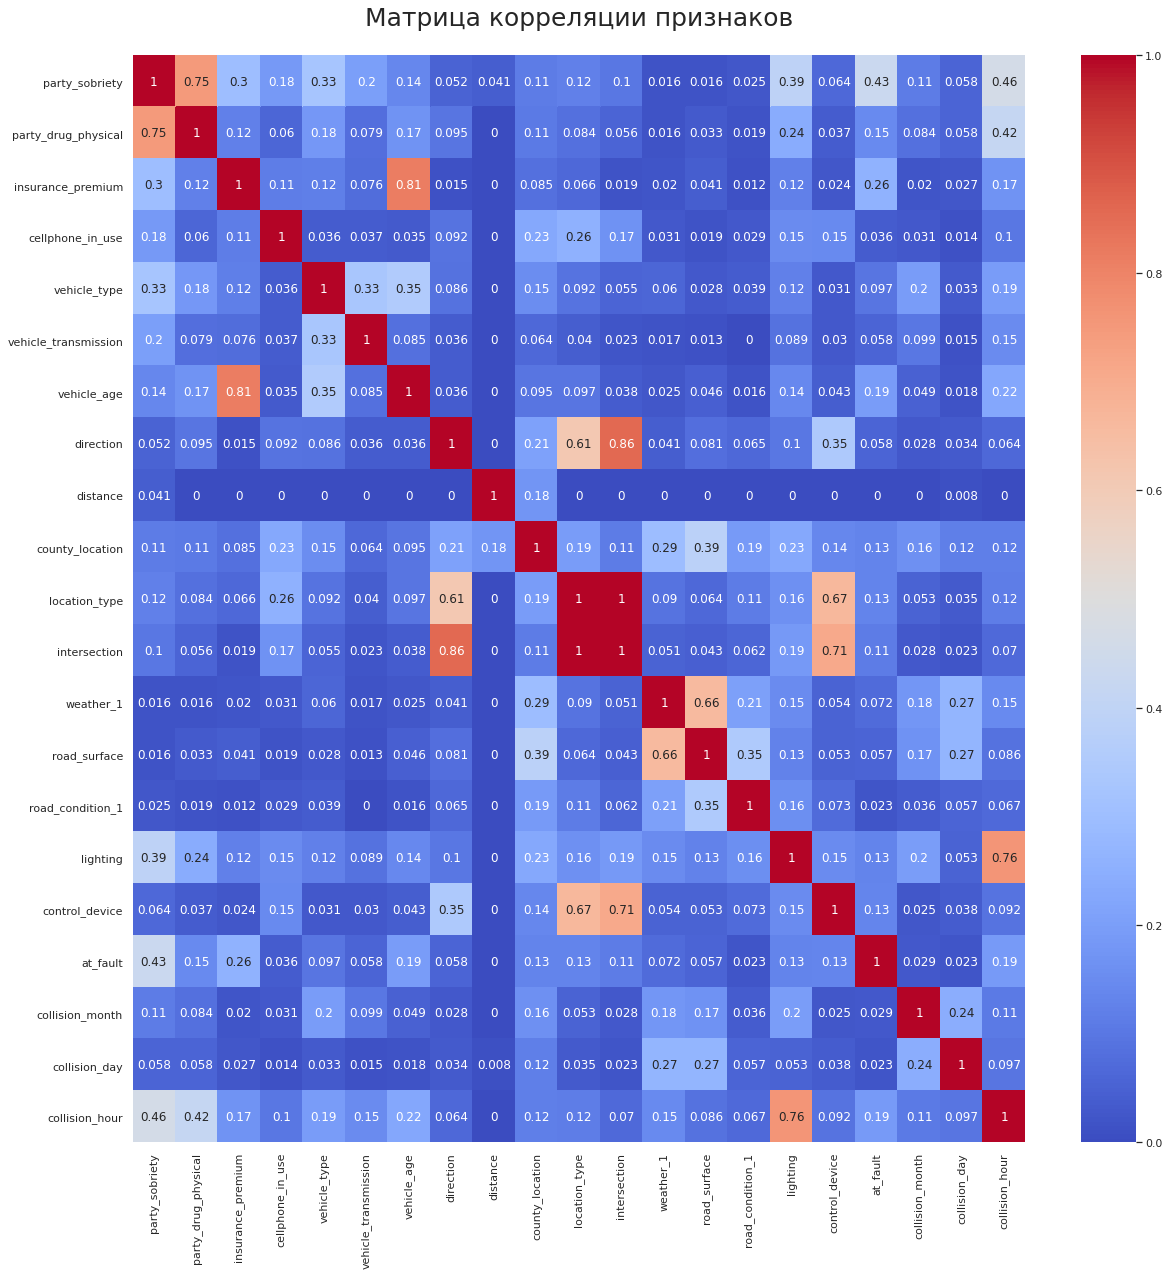

In [74]:
corr_matrix = data.phik_matrix()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции признаков', fontsize=25, pad=30)
plt.show()

#### Разделение данных на тренировочную, валидационную и тестовую выборки

In [75]:
#проверим баланс классов в исходном датафрейме
print(f"1) Баланс классов в неразделенном датасете: \n{data.at_fault.value_counts()}\n")

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns='at_fault'),
    data.at_fault,
    test_size=0.2, 
    random_state=12345
)

#проверим размерности датасетов
print(f"2) Размерности для тренировочного датасета: {X_train.shape, y_train.shape}\n")
print(f"3) Размерности для тестового датасета: {X_test.shape, y_test.shape}\n")

#проверим баланс целевого класса в разделенных данных
print(f"4) Баланс классов в X_train: \n{y_train.value_counts()}\n")
print(f"5) Баланс классов в X_train: \n{y_test.value_counts()}")

1) Баланс классов в неразделенном датасете: 
True     25829
False    25278
Name: at_fault, dtype: int64

2) Размерности для тренировочного датасета: ((40885, 20), (40885,))

3) Размерности для тестового датасета: ((10222, 20), (10222,))

4) Баланс классов в X_train: 
True     20646
False    20239
Name: at_fault, dtype: int64

5) Баланс классов в X_train: 
True     5183
False    5039
Name: at_fault, dtype: int64


- Классы распределены равномерно в тренировочной и валидационной выборке, значит, во время обучения модели не пострадают от наличия дисбаланса целевого класса.

---

### Определение метрик для оценок качества моделей

У нас основная задача, предоставленная бизнесом - это обезопасить (предупредить) пользователей авто от(о) возможной аварии.
Получается, модель, которую мы проектируем в первую очередь должна демонстрировать высокие показатели метрики полноты `recall`. Однако, учитывая, что наша модель может просто для всех автомобилей выдавать `True`, что значит - автомобиль попадет в аварию, то для оценки качества лучше всего использовать `f1_score`. Данная метрика помогает нам увеличивать метрику полноты `recall`, не забывая про точность `precision`.

### Построение моделей МО

*Линейные и деревянные модели*:

- Для кодирования категориальных фичей будем использовать `LeaveOneOutEncoder()`, так как нам важно, чтобы не было утечки данных, можно было сделать декодинг фичей после кросс-валидации и чтобы не было потери информации. Однако столбцы с месяцем, днём и часами мы закодируем с помощью `OrdinalEncoder`, потому что это порядковые показатели;

- Нормализовывать данные будем с помощью `StandardScaler()` только в линейных моделях, деревянные не ну будет нормализовывать, т.к. это не дает выигрыша;

*Модели градиентного спуска*:
- Кодирование категориальных переменных будет выполнено с помощью встроенных в классы моделей функций;
- Нормализация числовых данных не требуется, так как модели основаны на деревянных моделях.

#### Логистическая регрессия (LogisticRegression)

In [76]:
%%time
#кодирование категориальных переменных
loo_pipeline = Pipeline(
    steps=[
        ('encode', LeaveOneOutEncoder())
    ]
)

ord_pipeline = Pipeline(
    steps=[
        ('encode', OrdinalEncoder())
    ]
)

num_pipeline = Pipeline(
    steps=[
        ('encode', StandardScaler())
    ]
)

# преобразование столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('loo', loo_pipeline, CATEGORY_COLUMNS[:-3]),
        ('ord', ord_pipeline, CATEGORY_COLUMNS[-3:]),
        ('num', num_pipeline, NUMERIC_COLUMNS)
    ]
)

# пайплайн для кросс-валидации
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=2000, random_state=SEED, n_jobs=-1))
    ]
)

# параметры, которые будем перебирать
param_grid = {
    'classifier__solver' : ['liblinear', 'sag', 'lbfgs'], #'liblinear', 'sag', 'lbfgs'
    'classifier__C': [0.001, 0.1e-05, 1e-7, 1e-9], #0.001, 0.1e-5, 1e-7, 1e-9
    'classifier__penalty': ['l2']
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=KFold(
        n_splits=3,
        shuffle=True,
        random_state=SEED
    ),
    n_jobs=-1,
    verbose=5
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.631 total time=   0.5s
[CV 2/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.623 total time=   0.6s
[CV 3/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=liblinear;, score=0.626 total time=   0.8s
[CV 1/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=sag;, score=0.634 total time=   1.8s
[CV 2/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=sag;, score=0.624 total time=   1.7s
[CV 3/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=sag;, score=0.627 total time=   0.8s
[CV 1/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.634 total time=   3.0s
[CV 2/3] END classifier__C=0.001, classifier__penalty=l2, classifier__solver=lbfgs;, score=0.623 total time=   2.7s
[CV 3

GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('loo',
                                                                         Pipeline(steps=[('encode',
                                                                                          LeaveOneOutEncoder())]),
                                                                         ['party_sobriety',
                                                                          'party_drug_physical',
                                                                          'vehicle_type',
                                                                          'vehicle_transmission',
                                                                          'county_location',
                                                                          'weather_1',
                                                                          'location_type',
                                                                          'road_surface',
                                                                          'road_conditio...
                                                                        ('num',
                                                                         Pipeline(steps=[('encode',
                                                                                          StandardScaler())]),
                                                                         ['vehicle_age',
                                                                          'insurance_premium',
                                                                          'distance'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=2000,
                                                           n_jobs=-1,
                                                           random_state=12345))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.001, 1e-06, 1e-07, 1e-09],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['liblinear', 'sag', 'lbfgs']},
             scoring='f1', verbose=5)

In [77]:
print(f'- Наилучшие параметры: {grid_search.best_params_}')
print(f'- Лучшее значение f1_score во время кросс-валидации: {grid_search.best_score_:.3f}')

- Наилучшие параметры: {'classifier__C': 1e-07, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
- Лучшее значение f1_score во время кросс-валидации: 0.671


- Наилучшие параметры: {'classifier__C': 1e-07, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
- Лучшее значение f1_score во время кросс-валидации: 0.670

In [78]:
predictions = grid_search.predict(X_test) 
print(f'Результат метрики f1_score на тестовой выборке: {f1_score(y_test, predictions):.3f}')

Результат метрики f1_score на тестовой выборке: 0.673


- `Результат метрики f1_score на тестовой выборке: 0.667`

In [79]:
#сохраним данную модель как лучшую
best_model = copy.deepcopy(grid_search)

In [80]:
del grid_search

#### Гребневая регрессия (RidgeClassifier)

In [81]:
%%time
#кодирование категориальных переменных
loo_pipeline = Pipeline(
    steps=[
        ('encode', LeaveOneOutEncoder())
    ]
)

ord_pipeline = Pipeline(
    steps=[
        ('encode', OrdinalEncoder())
    ]
)

num_pipeline = Pipeline(
    steps=[
        ('encode', StandardScaler())
    ]
)

# преобразование столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('loo', loo_pipeline, CATEGORY_COLUMNS[:-3]),
        ('ord', ord_pipeline, CATEGORY_COLUMNS[-3:]),
        ('num', num_pipeline, NUMERIC_COLUMNS)
    ]
)

# пайплайн для кросс-валидации
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RidgeClassifier(random_state=SEED, fit_intercept=True))
    ]
)

# параметры, которые будем перебирать
param_grid = {
    'classifier__solver' : ['auto', 'lsqr', 'sparse_cg', 'sag'],
    'classifier__alpha' : [1.e+10, 1.e+20, 1.e+40],
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=KFold(
        n_splits=3,
        shuffle=True,
        random_state=SEED
    ),
    n_jobs=-1,
    verbose=5
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END classifier__alpha=10000000000.0, classifier__solver=auto;, score=0.671 total time=   0.7s
[CV 2/3] END classifier__alpha=10000000000.0, classifier__solver=auto;, score=0.673 total time=   0.7s
[CV 3/3] END classifier__alpha=10000000000.0, classifier__solver=auto;, score=0.669 total time=   0.8s
[CV 1/3] END classifier__alpha=10000000000.0, classifier__solver=lsqr;, score=0.671 total time=   0.8s
[CV 2/3] END classifier__alpha=10000000000.0, classifier__solver=lsqr;, score=0.673 total time=   0.7s
[CV 3/3] END classifier__alpha=10000000000.0, classifier__solver=lsqr;, score=0.669 total time=   0.8s
[CV 1/3] END classifier__alpha=10000000000.0, classifier__solver=sparse_cg;, score=0.671 total time=   0.7s
[CV 2/3] END classifier__alpha=10000000000.0, classifier__solver=sparse_cg;, score=0.673 total time=   0.8s
[CV 3/3] END classifier__alpha=10000000000.0, classifier__solver=sparse_cg;, score=0.669 total time=   0.

GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('loo',
                                                                         Pipeline(steps=[('encode',
                                                                                          LeaveOneOutEncoder())]),
                                                                         ['party_sobriety',
                                                                          'party_drug_physical',
                                                                          'vehicle_type',
                                                                          'vehicle_transmission',
                                                                          'county_location',
                                                                          'weather_1',
                                                                          'location_type',
                                                                          'road_surface',
                                                                          'road_conditio...
                                                                         ['collision_month',
                                                                          'collision_day',
                                                                          'collision_hour']),
                                                                        ('num',
                                                                         Pipeline(steps=[('encode',
                                                                                          StandardScaler())]),
                                                                         ['vehicle_age',
                                                                          'insurance_premium',
                                                                          'distance'])])),
                                       ('classifier',
                                        RidgeClassifier(random_state=12345))]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [10000000000.0, 1e+20, 1e+40],
                         'classifier__solver': ['auto', 'lsqr', 'sparse_cg',
                                                'sag']},
             scoring='f1', verbose=5)

In [82]:
print(f'- Наилучшие параметры: {grid_search.best_params_}')
print(f'- Лучшее значение f1_score во время кросс-валидации: {grid_search.best_score_:.3f}')

- Наилучшие параметры: {'classifier__alpha': 10000000000.0, 'classifier__solver': 'auto'}
- Лучшее значение f1_score во время кросс-валидации: 0.671


In [83]:
predictions = grid_search.predict(X_test) #X_test_linear
print(f'Результат метрики f1_score на тестовой выборке: {f1_score(y_test, predictions):.3f}')

Результат метрики f1_score на тестовой выборке: 0.673


In [84]:
del grid_search

#### Лес решений (RandomForestClassifier)

In [86]:
%%time
#кодирование категориальных переменных
loo_pipeline = Pipeline(
    steps=[
        ('encode', LeaveOneOutEncoder())
    ]
)

ord_pipeline = Pipeline(
    steps=[
        ('encode', OrdinalEncoder())
    ]
)

# преобразование столбцов
preprocessor = ColumnTransformer(
    transformers=[
        ('loo', loo_pipeline, CATEGORY_COLUMNS[:-3]),
        ('ord', ord_pipeline, CATEGORY_COLUMNS[-3:])
    ]
)

# пайплайн для кросс-валидации
model_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=SEED, n_jobs=-1))
    ]
)

# параметры для кросс-валидации
param_grid = {
    'classifier__n_estimators': [1, 5, 10, 15], #[5, 10, 15, 20, 25],
    'classifier__max_depth': [5, 6, 7, 8, 9, 10], # 4, 5, 6, 7, 8, 9, 10
    'classifier__min_samples_split': [2, 4], #[2, 4, 6]
    'classifier__min_samples_leaf': [1, 2], #[1, 2, 3]
    'classifier__criterion': ['log_loss'] # используем данный критерий, так как у нас классы сбалансированы
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',
    cv=KFold(
        n_splits=3,
        shuffle=True,
        random_state=SEED
    ),
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
CPU times: user 2min 24s, sys: 328 ms, total: 2min 25s
Wall time: 2min 25s


GridSearchCV(cv=KFold(n_splits=3, random_state=12345, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('loo',
                                                                         Pipeline(steps=[('encode',
                                                                                          LeaveOneOutEncoder())]),
                                                                         ['party_sobriety',
                                                                          'party_drug_physical',
                                                                          'vehicle_type',
                                                                          'vehicle_transmission',
                                                                          'county_location',
                                                                          'weather_1',
                                                                          'location_type',
                                                                          'road_surface',
                                                                          'road_conditio...
                                                                         ['collision_month',
                                                                          'collision_day',
                                                                          'collision_hour'])])),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=12345))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['log_loss'],
                         'classifier__max_depth': [5, 6, 7, 8, 9, 10],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 4],
                         'classifier__n_estimators': [1, 5, 10, 15]},
             scoring='f1', verbose=1)

In [87]:
print(f'- Наилучшие параметры: {grid_search.best_params_}')
print(f'- Лучшее значение f1_score во время кросс-валидации: {grid_search.best_score_:.3f}')

- Наилучшие параметры: {'classifier__criterion': 'log_loss', 'classifier__max_depth': 6, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 1}
- Лучшее значение f1_score во время кросс-валидации: 0.667


In [88]:
predictions = grid_search.predict(X_test)
print(f'Результат метрики f1_score на тестовой выборке: {f1_score(y_test, predictions):.3f}')

Результат метрики f1_score на тестовой выборке: 0.672


#### CatboostClassifier

In [92]:
param = {
    'learning_rate': 0.1,
    'iterations': 2000,
    'loss_function': 'Logloss',
    'eval_metric': 'F1',
    'score_function': 'L2',
    'random_state': SEED,
    'early_stopping_rounds': 200,
    'verbose': False,
    'cat_features': CATEGORY_COLUMNS
}

#параметры для кросс-валидации
param_grid={
    'depth':[5, 6, 7, 8, 9, 10],
    'l2_leaf_reg': [1, 50, 100, 250, 1000]
}

In [94]:
%%time
model = CatBoostClassifier(**param)

grid_search = model.grid_search(param_grid,
            X=X_train,
            y=y_train,
            cv=3,
            partition_random_seed=SEED,
            shuffle=True,
            train_size=0.8,
            verbose=False,
            plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6850065189
bestIteration = 698

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.68417631
bestIteration = 602

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6875323332
bestIteration = 1087

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6854020297
bestIteration = 779

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6866786911
bestIteration = 1544

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6806282723
bestIteration = 482

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6865477276
bestIteration = 571

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6895119418
bestIteration = 648

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6835443038
bestIteration = 329

Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6840340469
bestIterati

In [95]:
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=CATEGORY_COLUMNS)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=CATEGORY_COLUMNS) 

In [96]:
best_params=grid_search['params']
best_params

{'depth': 7, 'l2_leaf_reg': 50}

In [97]:
param.update(best_params)

param

{'learning_rate': 0.1,
 'iterations': 2000,
 'loss_function': 'Logloss',
 'eval_metric': 'F1',
 'score_function': 'L2',
 'random_state': 12345,
 'early_stopping_rounds': 200,
 'verbose': False,
 'cat_features': ['party_sobriety',
  'party_drug_physical',
  'vehicle_type',
  'vehicle_transmission',
  'county_location',
  'weather_1',
  'location_type',
  'road_surface',
  'road_condition_1',
  'lighting',
  'intersection',
  'cellphone_in_use',
  'direction',
  'control_device',
  'collision_month',
  'collision_day',
  'collision_hour'],
 'depth': 7,
 'l2_leaf_reg': 50}

In [98]:
model.fit(
    train_pool,
    eval_set=test_pool,
    verbose=False,
    use_best_model=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [99]:
print('Model is fitted: {}\n'.format(model.is_fitted()))
print('Model params:\n{}\n'.format(model.get_params()))
print('Tree count: ' + str(model.tree_count_))
print(model.get_best_score())

Model is fitted: True

Model params:
{'iterations': 2000, 'learning_rate': 0.1, 'loss_function': 'Logloss', 'verbose': False, 'eval_metric': 'F1', 'random_state': 12345, 'early_stopping_rounds': 200, 'cat_features': ['party_sobriety', 'party_drug_physical', 'vehicle_type', 'vehicle_transmission', 'county_location', 'weather_1', 'location_type', 'road_surface', 'road_condition_1', 'lighting', 'intersection', 'cellphone_in_use', 'direction', 'control_device', 'collision_month', 'collision_day', 'collision_hour'], 'score_function': 'L2', 'depth': 7, 'l2_leaf_reg': 50}

Tree count: 535
{'learn': {'Logloss': 0.48721051952380573, 'F1': 0.7492355525862734}, 'validation': {'Logloss': 0.5375160564111945, 'F1': 0.6942590120160214}}


In [100]:
predictions = model.predict(test_pool) #получили предсказания в строковом виде
#приведем предсказания к булеву типу, чтобы можно было производит расчет метрики 
predictions = np.where(predictions == 'True', True, False) 

print(f'Результат метрики f1_score на тестовой выборке: {f1_score(y_test, predictions):.3f}')

Результат метрики f1_score на тестовой выборке: 0.694


---

В итоге, лучшие показатели у меня выдала модель `CatBoost'а`. Её метрика `F1` на тестовой выборке равняется `0.694`, что является неплохим результатом. Возможно, что метрику удасться улучшить изменив порог классификации, но этим мы займемся чуть позже.

---

## Проведение анализа результатов работы модели

### Построение матрицы ошибок (PR-кривой)

In [102]:
probabilities = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)
display(precision)
display(recall)
display(thresholds)

array([0.50704363, 0.50709324, 0.50714286, ..., 1.        , 1.        ,
       1.        ])

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.85876905e-04, 1.92938453e-04, 0.00000000e+00])

array([0.00532188, 0.00578632, 0.00582745, ..., 0.99735385, 0.99737954,
       0.99800028])

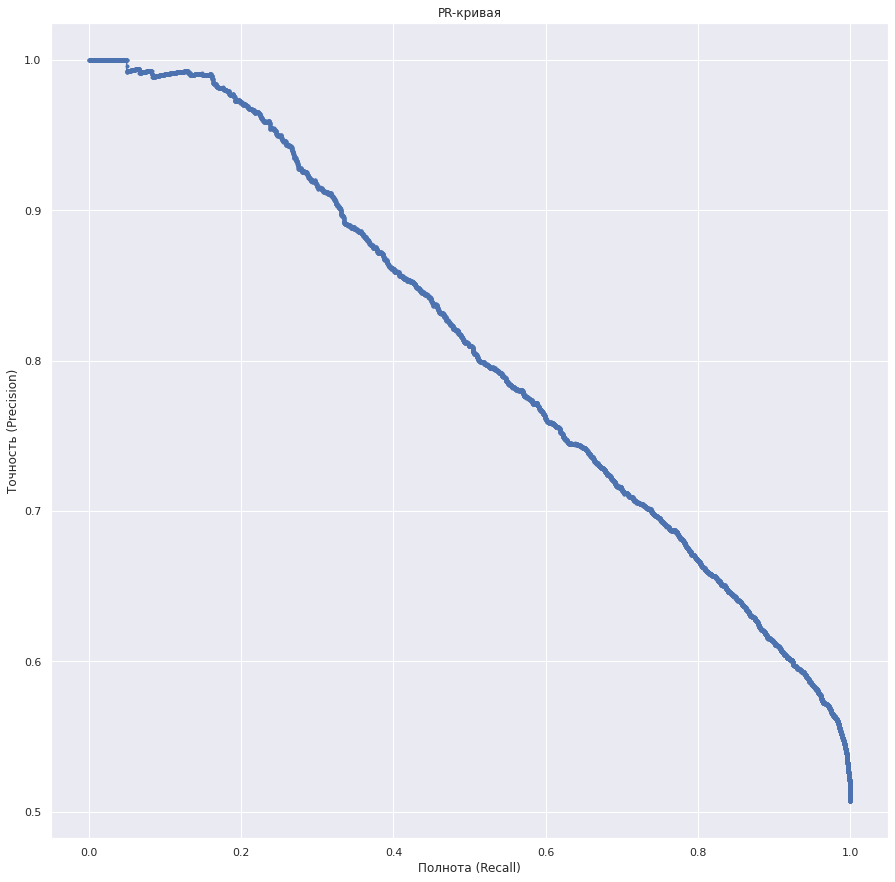

In [103]:
plt.figure(figsize=(15, 15))
plt.plot(recall, precision, marker='.')
plt.xlabel('Полнота (Recall)')
plt.ylabel('Точность (Precision)')
plt.title('PR-кривая')
plt.grid(True)
plt.show()

Для нас важнее всего полнота `recall`, поэтому мы в первую очередь смотрим на ее показатели, так как от этого могут зависеть человеческие жизни и финансовая безопасность компании. Потом тоже немаловажен `precision`. Значит, мы должны больше ориентироваться на показатели функции `f1_score`. 

Рассмотрев вышеуказанный график видно, что сначала функция точности от полноты линейно убывает, а потом параболически затухает, следовательно, чтобы у нас было максимальное значение полноты и наибольшее значение точности, мы должны рассмотреть точку этого перегиба, которая будет соответствовать наилучшему порогу.

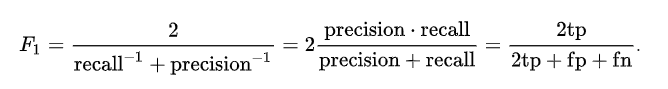

In [141]:
target = 0.645
closest_index = (np.abs(precision - target)).argmin()

print(f'Наиболее результативный порог: {thresholds[closest_index]:.2f}')

Наиболее результативный порог: 0.37


Зная формулу данной функции и глядя на характер PR-кривой, можно сделать вывод, что самые высокие значения метрики `f1_score` будут при пороге примерно равном `0.37`, который будет служить наилучшим гарантом высокого значения F1_score.

In [142]:
threshold = thresholds[closest_index]

probabilities = model.predict_proba(X_test)[:, 1]

predictions = (probabilities >= threshold).astype(int)

print(f"Лучшая метрика {f1_score(y_test, predictions):.3f}")

Лучшая метрика 0.731


В итоге, мы пришли к выводу, что изменение нашего порога с 0.5 на 0.37 позволило улучшить показатели целевой метрики `F1` на 37 пунктов, как следствие, наша модель стала еще лучше.

### Анализ важности основных факторов ДТП

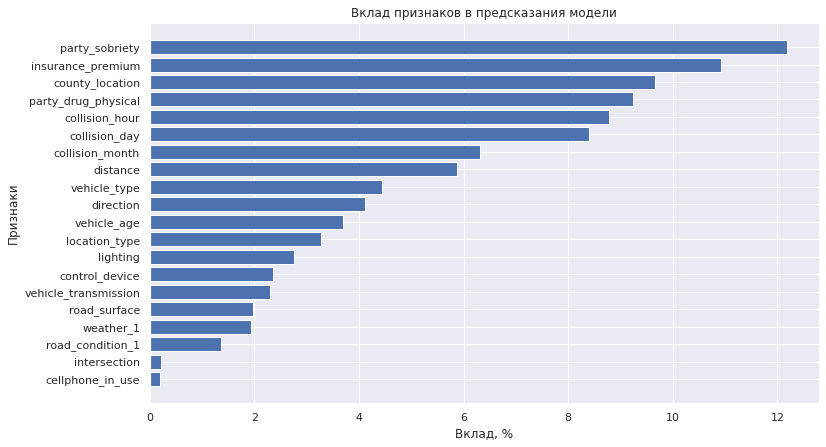

In [101]:
#получение важности признаков
feature_importance = model.get_feature_importance(prettified=True)

#построение графика
plt.figure(figsize=(12, 7))
plt.barh(feature_importance['Feature Id'], feature_importance['Importances'])
plt.xlabel('Вклад, %')
plt.ylabel('Признаки')
plt.title('Вклад признаков в предсказания модели')
plt.gca().invert_yaxis()  # Инвертирование оси Y для отображения наиболее важных признаков сверху
plt.show()

Наша модель определила такие наиболее влиятельные на риск ДТП признаки:
1) Трезвость водителя (очевидно, так как влияет на скорость реакции водителя);
2) Сумма страховки автомобиля (влияет на отношение к вождению авто);
3) Штат, где арендован автомобиль (в разных локациях, как известно, люди водят по разному + стоит учитывать разницу в состоянии дорог и их типе);
4) Физическое состояние участника (см. 1-ый пункт);
5) Время, когда был взят авто (вождение ночью или в час пик является наиболее вероятным условием для происшествия).

Все выше перечисленные признаки действительно влияют на риски попадания в аварию, если так как известно, что, например, любая дорожная служба запрещает вождение в нетрезвом виде, или что вождение в ночное время суток может быть опасно, например, из-за того, что дороги пустые, и автомобилист из-за этого может привысить скорость, что, разумеется, повышает риски аварии.

Более подробнее вышеперечисленные пункты я опишу в выводе.

### Зависимость целевой переменной от значений нескольких важных переменных 

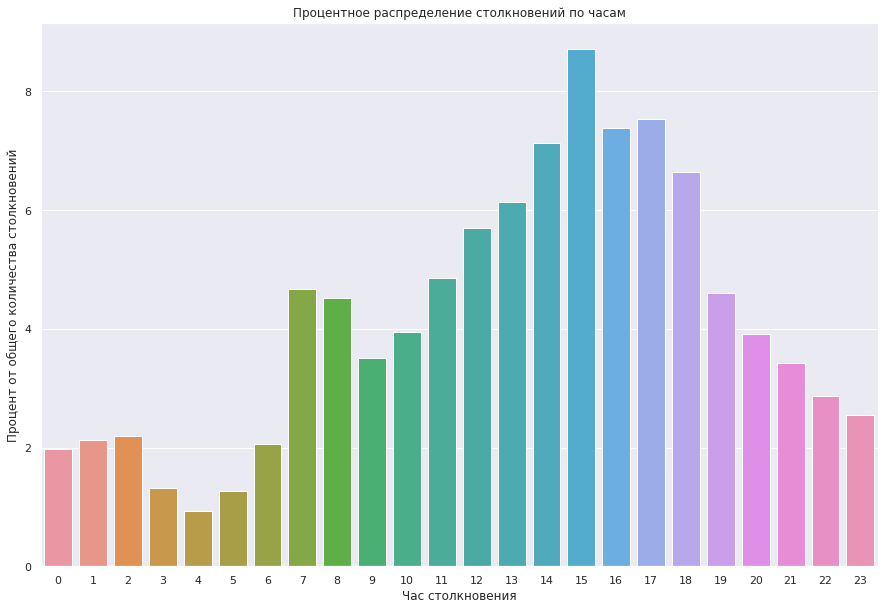

In [143]:
hour_counts = data['collision_hour'].value_counts().reset_index()
hour_counts.columns = ['collision_hour', 'count']

total_count = data['collision_hour'].count()
hour_counts['percentage'] = (hour_counts['count'] / total_count) * 100

plt.figure(figsize=(15, 10))
sns.barplot(data=hour_counts, x='collision_hour', y='percentage')
plt.xlabel('Час столкновения')
plt.ylabel('Процент от общего количества столкновений')
plt.title('Процентное распределение столкновений по часам')
plt.show()

- Как видно из распределения для столкновений по часам, наибольшее число столкновений происходит именно в часы пик, когда люди едут на работу и с работы. Больше, конечно же, аварий в вечернее время, так как обычно в это время суток люди из-за усталости менее внимательны, видимость хуже и число автомобилей может быть даже больше, чем с утра.

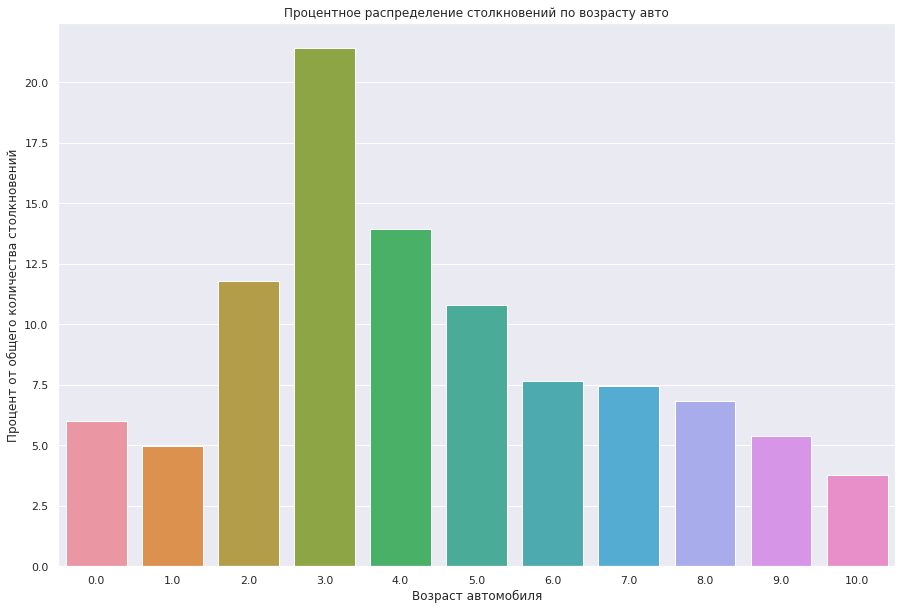

In [144]:
hour_counts = data['vehicle_age'].value_counts().reset_index()
hour_counts.columns = ['vehicle_age', 'count']

total_count = data['vehicle_age'].count()
hour_counts['percentage'] = (hour_counts['count'] / total_count) * 100

plt.figure(figsize=(15, 10))
sns.barplot(data=hour_counts, x='vehicle_age', y='percentage')
plt.xlabel('Возраст автомобиля')
plt.ylabel('Процент от общего количества столкновений')
plt.title('Процентное распределение столкновений по возрасту авто')
plt.show()

- Из графика видно, что чаще всего в аварии попадают машины возрастом от 2-х до 5-ти лет, однако это можно объяснить тем, что информация об авариях была собрана в США, а там основное количество именно машин такого возраста ввиду популярности лизинга. Однако не стоит забывать, что не все пользуются лизингом, кто-то покупает авто и больше не меняет его. Следовательно, возраст авто может отражать косвенно стаж водителя, а от стажа довольно сильно зависит отношение водителя к вождению и его качество. Данный факт можно увидеть, так как с увеличением возраста падает число аварий. 

#### Предложения по оборудованию автомобиля для предотвращения ДТП

1) Обязательная установка трубки для проверки водителя на алкогольное опьянение. Плюс для проверки, что в трубку дышит именно водитель, поставить прибор компьютерного зрения. При наличии алкоголя в организме отказать в доступе к авто;

2) Прибор с вопросами касаемо состояния автомобилиста и принимаемых им лекарств. В случае если водитель чувствует себя неважно или принимает препараты, которые могут ухудшить качество управления транспортным средством, то предложить ему самый безопасный маршрут с минимальным количеством потока и наиболее качественной дорогой, если таких вариантов нет или риск попасть в аварию слишком высок, то система не дает возможность водителю завести машину;

3) Умный навигатор, который помимо анализа времени в пути будет предоставлять самый безопасный маршрут;

4) Система по ограничению скорости перед и во время прохождения опасных участков пути, чтобы водитель физически не мог ускориться в этих промежутках.

5) Оборудование автопилотом и автоматическим вызовом скорой помощи (в крайних случаях без согласия водителя) на случай ухудшения состояния автомобилиста во время поездки;

6) Анализатор с контролем наличия водительский прав у водителя, также используется система машинного зрения для контроля за тем, чтобы права, которые были отсканированы и человек, изображенный на них, действительно сидел за рулем;

7) Система контроля за скоростью, при которой будет запрещено превышать скорость на определенных навигатором участках дороги;

8) Работающий напротяжение всей поездки полу-автопилот, который будет следить за тем, чтобы водитель не совершал потенциальноопасные маневры, и предотвращать их.

## Выводы

1) Модель показала неплохую предсказательную и обобщающую способность. Метрика `F1 score` для данной модели на тестовых данных составила 0.731, что является неплохим результатом с учетом того, что был подобран необходимый порог для данного значения, чтобы метрика `recall` полноты была максимально близка к 1, так как нам важно предотвратить аварию и сохранить людям здоровье и жизни.

2) В лучшей модели основными критериями для оценки вероятности происшествия являются:

- `Физическое состояние водителя` и  `Трезвость водителя`, данные фичи действительно сильно влияют на аварийность на дорогах, так как еще полноценно не внедрены машины с автопилотом, а адекватность принятия решений тем, кто за рулем, сильно влияет на происходящее на дороге;

- `Локация вождения`, данный признак показывает место, где происходит передвижения нашего автолюбителя. Получается, наша модель определила, в каком штате наиболее отвязные водители, что имеет место быть в реалиях мира. Также не стоит про то, что в разных локациях могут быть абсолютно разные типы дорожных покрытий и их качество, что тоже влияет на частоту происшествий;

- `Сумма страховки`, что логично, так как влияет на то, насколько дорогой автомобиль и, как следствие, чем дороже авто, тем больше страховка и, следовательно, тем аккуратнее будет ездить автомобилист.

3) Дополнительные характеристики, которые могут помочь модели делать более качественные предсказания: 

- проверка на наличие штрафов у водителя в прошлом;

- использовал ли водитель ремни безопасности в прошлые разы, когда использовал каршеринг данной компании;

- какой у водителя стаж вождения;


4) Подводя итог, что касается предложенных мной улучшений, которые могут снизить число происшествий на дорогах, то думаю, что это вполне реально сделать, однако для этого необходимо довольно больше количество денежных и технологических вложений со стороны автомобильных компаний, однако это может быть невыгодно для них, так как разбитая вчера машина - это новая купленная завтра машина. То есть, тем самым, они могут сами себе сократить число покупок новых машин. Потом необходимо участие государства, так как без правового подкрепления автокомпании вряд ли будут с нужным рвением заниматься данным вопросом.